## Project Name - **Student Grades Prediction**


##### Name - Aman Mulla.
##### Batch - DS2307



# **Project Summary -**

**This project revolves around a comprehensive dataset encompassing students' grades across various university courses and their resultant Cumulative Grade Point Average (CGPA) over their four-year tenure. The dataset comprises 43 columns, notably featuring Seat Numbers identifying individual candidates and the CGPA, representing their overall academic performance.**

**Each column, except Seat No and CGPA, corresponds to course codes following a specific format denoting the department and year when the candidate took the exam. The objective here is to predict a student's CGPA based on their performance across these diverse courses throughout their academic journey.The predictive focus entails leveraging machine learning models to comprehend the relationship between the grades obtained in different courses over the four-year period and the resultant CGPA. By employing statistical analysis and predictive modeling techniques, this project aims to establish a predictive framework capable of estimating a student's CGPA based on their grades across multiple courses.**

We have total 43 columns in which 1st one is Seat No. and last one is CGPA based on the four year total grade progress of each candidate.

All other columns are course codes in the format AB-XXX where AB are alphabets representing candidates' departments and XXX are numbers where first X represents the year the canditate took exam.



**Below tables shows Year wise cource Code, in 1st, 2nd and 3rd year there was total 11 subject while for 4th year there was 8 subjects.**

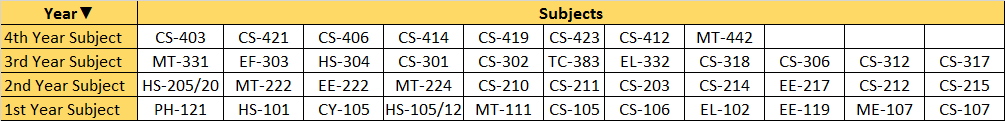

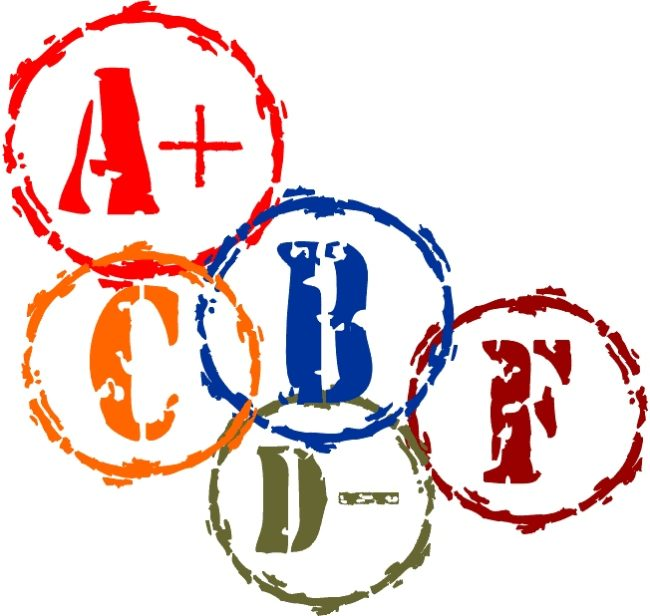

# **Problem Statement**

**Develop a predictive model to accurately forecast a student's Cumulative Grade Point Average (CGPA) based on their cource grades of a four-year tenure. The challenge involves leveraging a dataset containing 43 columns, including individual Seat Numbers and course-specific grades denoted by unique codes reflecting departmental affiliation and examination year.**

**The objective is to construct a machine learning model capable of understanding the intricate relationship between the grades obtained in diverse courses and the resultant CGPA. The model should effectively analyze this multi-dimensional dataset, employing statistical analysis, feature engineering, and predictive modeling techniques to derive insights into the factors influencing a student's overall academic performance.**

## Knowing data and variable in dataset

In [203]:
# Importing Necessary Libraries.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', None)

In [204]:
# loading dataset

grades_data = pd.read_csv('/content/drive/MyDrive/DataSets/Grades.csv')

grades_data.head()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-317,MT-442,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,B+,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D,C-,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,A,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,C,C-,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B+,A-,B+,B-,A-,A,A-,A-,A,3.448


In [205]:
grades_data.shape

(571, 43)

In [206]:
grades_data.columns

Index(['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
       'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20',
       'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214',
       'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301',
       'CS-302', 'TC-383', 'EL-332', 'CS-318', 'CS-306', 'CS-312', 'CS-317',
       'MT-442', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423',
       'CS-412', 'CGPA'],
      dtype='object')

**We have total 571 student records with 43 rows including seat no. and CGPA.**

For simplicity in further will rename for some column names.


In [207]:
grades_data.rename(columns={'HS-105/12':'HS-105'},inplace=True)

grades_data.rename(columns={'HS-205/20':'HS-205'},inplace=True)

grades_data.rename(columns={'Seat No.':'Seat_no'},inplace=True)

**Dataset Information**

In [208]:
grades_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Seat_no  571 non-null    object 
 1   PH-121   571 non-null    object 
 2   HS-101   571 non-null    object 
 3   CY-105   570 non-null    object 
 4   HS-105   570 non-null    object 
 5   MT-111   569 non-null    object 
 6   CS-105   571 non-null    object 
 7   CS-106   569 non-null    object 
 8   EL-102   569 non-null    object 
 9   EE-119   569 non-null    object 
 10  ME-107   569 non-null    object 
 11  CS-107   569 non-null    object 
 12  HS-205   566 non-null    object 
 13  MT-222   566 non-null    object 
 14  EE-222   564 non-null    object 
 15  MT-224   564 non-null    object 
 16  CS-210   564 non-null    object 
 17  CS-211   566 non-null    object 
 18  CS-203   566 non-null    object 
 19  CS-214   565 non-null    object 
 20  EE-217   565 non-null    object 
 21  CS-212   565 non

From above we can observe that we have 2 types of dataset object and float type.

**Will Check for Null Values present in dataset**

In [209]:
grades_data.isnull().sum()

Seat_no     0
PH-121      0
HS-101      0
CY-105      1
HS-105      1
MT-111      2
CS-105      0
CS-106      2
EL-102      2
EE-119      2
ME-107      2
CS-107      2
HS-205      5
MT-222      5
EE-222      7
MT-224      7
CS-210      7
CS-211      5
CS-203      5
CS-214      6
EE-217      6
CS-212      6
CS-215      6
MT-331      9
EF-303     10
HS-304     10
CS-301     10
CS-302     10
TC-383     10
EL-332      9
CS-318      9
CS-306      9
CS-312     10
CS-317     12
MT-442     10
CS-403     12
CS-421     12
CS-406     85
CS-414     13
CS-419     13
CS-423     14
CS-412     79
CGPA        0
dtype: int64

<Axes: >

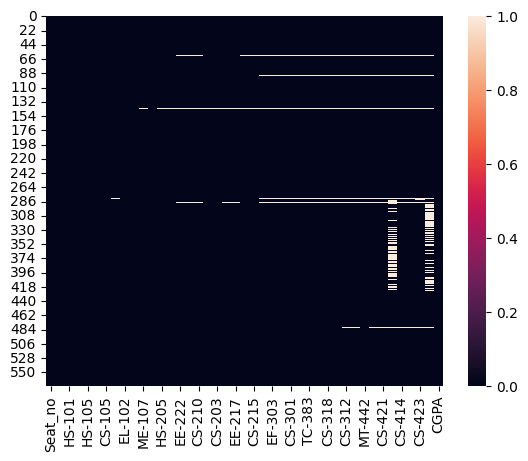

In [210]:
sns.heatmap(grades_data.isnull())

We have few Null values in some of course code, will replace same with 0.

In [211]:
grades_data.replace(np.nan,0, inplace = True)

grades_data.isnull().sum()

Seat_no    0
PH-121     0
HS-101     0
CY-105     0
HS-105     0
MT-111     0
CS-105     0
CS-106     0
EL-102     0
EE-119     0
ME-107     0
CS-107     0
HS-205     0
MT-222     0
EE-222     0
MT-224     0
CS-210     0
CS-211     0
CS-203     0
CS-214     0
EE-217     0
CS-212     0
CS-215     0
MT-331     0
EF-303     0
HS-304     0
CS-301     0
CS-302     0
TC-383     0
EL-332     0
CS-318     0
CS-306     0
CS-312     0
CS-317     0
MT-442     0
CS-403     0
CS-421     0
CS-406     0
CS-414     0
CS-419     0
CS-423     0
CS-412     0
CGPA       0
dtype: int64

### **We have all data in object type datatype and need to convert textual information into numerical types through encoding**

In [212]:
grades_data.reset_index(drop=True,inplace=True)


for column in grades_data.columns:

    grades_data[column]=grades_data[column].replace('A+',4.0)
    grades_data[column]=grades_data[column].replace('A',4.0)
    grades_data[column]=grades_data[column].replace('A-',3.7)
    grades_data[column]=grades_data[column].replace('B+',3.4)
    grades_data[column]=grades_data[column].replace('B',3.0)
    grades_data[column]=grades_data[column].replace('B-',2.7)
    grades_data[column]=grades_data[column].replace('C+',2.4)
    grades_data[column]=grades_data[column].replace('C',2.0)
    grades_data[column]=grades_data[column].replace('C-',1.7)
    grades_data[column]=grades_data[column].replace('D+',1.4)
    grades_data[column]=grades_data[column].replace('D',1.0)
    grades_data[column]=grades_data[column].replace('F',0.0)
    grades_data[column]=grades_data[column].replace('WU',0.0)
    grades_data[column]=grades_data[column].replace('W',0.0)
    grades_data[column]=grades_data[column].replace('I',0.0)


grades_data.head(2)

,Seat_no,PH-121,HS-101,CY-105,HS-105,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-317,MT-442,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,2.7,1.4,1.7,2.0,1.7,1.4,1.0,1.7,2.7,...,1.7,3.4,1.7,1.7,3.7,4.0,1.7,3.0,3.7,2.205
1,CS-97002,4.0,1.0,1.4,1.0,2.7,2.0,1.0,4.0,1.4,...,1.0,1.7,2.0,1.0,3.7,2.7,2.0,2.0,3.0,2.008


#### Chart - 1

### **Count of Seat Numbers for cource code 'PH-121', 'HS-101', 'CY-105'**

In [213]:
# Will get value count and average CGPA for each mentioned course code.

courses = ['PH-121', 'HS-101', 'CY-105']

# Creating dictionaries to hold average CGPA and value counts for each course
course_avg_cgpa = {}
course_value_counts = {}

for course in courses:
    course_avg_cgpa[course] = grades_data.groupby(course)['CGPA'].mean()

    course_value_counts[course] = grades_data[course].value_counts().sort_index()

for course in courses:
    print(f"Course: {course}")
    print(f"Average CGPA for {course}:")
    print(course_avg_cgpa[course])
    print("\nValue counts for {course}:")
    print(course_value_counts[course])
    print("\n")

Course: PH-121
Average CGPA for PH-121:
PH-121
0.0    1.090667
1.0    2.116295
1.4    2.349045
1.7    2.360632
2.0    2.602152
2.4    2.836516
2.7    2.698054
3.0    2.949351
3.4    3.038000
3.7    3.126973
4.0    3.502068
Name: CGPA, dtype: float64

Value counts for {course}:
0.0      3
1.0     44
1.4     22
1.7     19
2.0     33
2.4     31
2.7     56
3.0     57
3.4     61
3.7    112
4.0    133
Name: PH-121, dtype: int64


Course: HS-101
Average CGPA for HS-101:
HS-101
0.0    0.800000
1.0    2.268178
1.4    2.424667
1.7    2.654820
2.0    2.813088
2.4    2.872064
2.7    2.997987
3.0    3.059540
3.4    3.282186
3.7    3.268195
4.0    3.567429
Name: CGPA, dtype: float64

Value counts for {course}:
0.0     1
1.0    45
1.4    36
1.7    50
2.0    68
2.4    47
2.7    78
3.0    63
3.4    59
3.7    82
4.0    42
Name: HS-101, dtype: int64


Course: CY-105
Average CGPA for CY-105:
CY-105
0.0    1.731200
1.0    2.026161
1.4    2.104786
1.7    2.281125
2.0    2.453684
2.4    2.682471
2.7    2.574

<Axes: xlabel='CY-105', ylabel='count'>

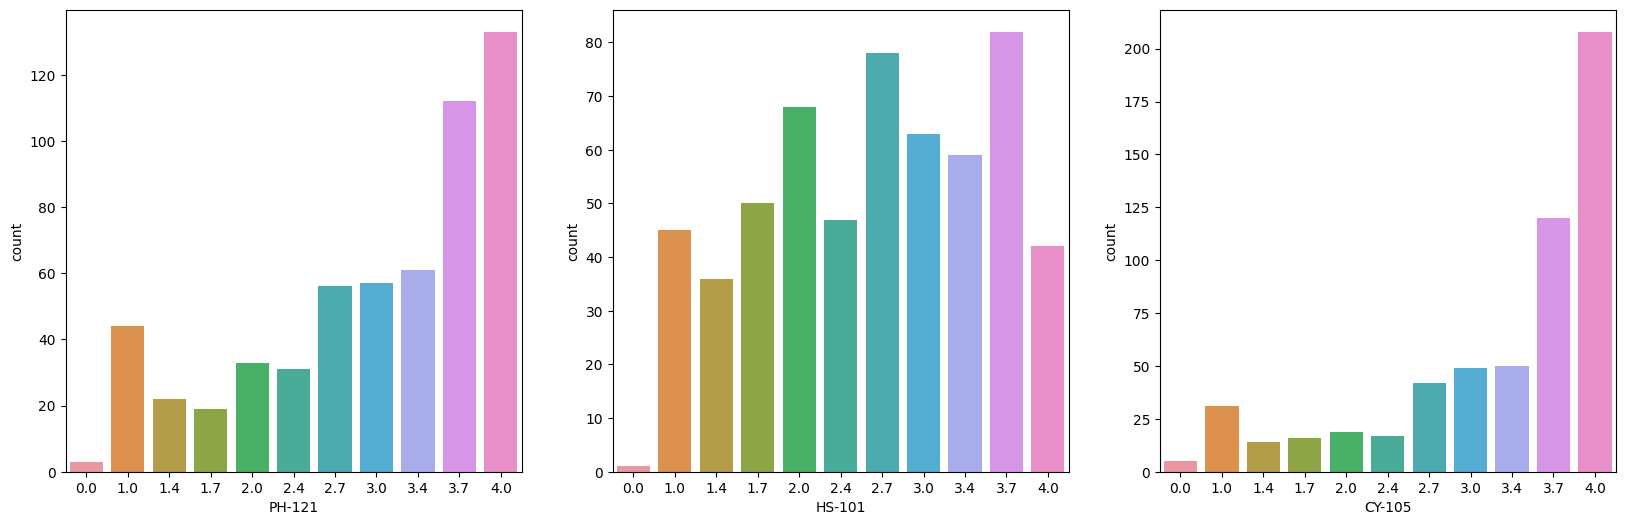

In [214]:
fig,axs = plt.subplots(1,3,figsize=(20,6))

sns.countplot(grades_data,x='PH-121',ax=axs[0])

sns.countplot(grades_data,x='HS-101',ax=axs[1])

sns.countplot(grades_data,x='CY-105',ax=axs[2])

**From above graph we have below insights:**

* Each subplot represents the count of occurrences for a specific course code ('PH-121', 'HS-101', 'CY-105') within the dataset.
* The height of each bar in the plot indicates the frequency or count of appearances of each category (in this case, grades or course-related data) within the respective course column.
* **From above each subplot,**

   1. **For course code PH-121, the highest student count is observed for grades 4.0 (A+) and 3.7 (A-), whereas notably fewer students received grades 0.0 (F) and 1.7 (C-).**
   2. **Regarding course code HS-101, the highest student count is for grades 3.7 (A-) and 2.7 (B-), while there's a lower count for grades 0.0 (F) and 1.4 (D+).**
   3. **Concerning course code CY-105, the highest student count is seen for grades 4.0 (A+) and 3.7 (A-), with a lower count for grades 0.0 (F) and 1.4 (D+).**

#### Chart - 2

### **Count of Seat Numbers for cource code 'HS-105', 'MT-111', 'CS-105'**

In [215]:
# Will get value count and average CGPA for each mentioned course code.

courses = ['HS-105', 'MT-111', 'CS-105']

# Creating dictionaries to hold average CGPA and value counts for each course
course_avg_cgpa = {}
course_value_counts = {}

for course in courses:
    course_avg_cgpa[course] = grades_data.groupby(course)['CGPA'].mean()

    course_value_counts[course] = grades_data[course].value_counts().sort_index()

for course in courses:
    print(f"Course: {course}")
    print(f"Average CGPA for {course}:")
    print(course_avg_cgpa[course])
    print("\nValue counts for {course}:")
    print(course_value_counts[course])
    print("\n")

Course: HS-105
Average CGPA for HS-105:
HS-105
0.0    1.559500
1.0    2.164111
1.4    2.452000
1.7    2.491306
2.0    2.507902
2.4    2.844846
2.7    2.821525
3.0    3.006386
3.4    3.229757
3.7    3.214973
4.0    3.425838
Name: CGPA, dtype: float64

Value counts for {course}:
0.0      4
1.0     45
1.4     34
1.7     36
2.0     41
2.4     39
2.7     40
3.0     57
3.4     70
3.7     75
4.0    130
Name: HS-105, dtype: int64


Course: MT-111
Average CGPA for MT-111:
MT-111
0.0    1.382714
1.0    2.074692
1.4    2.252714
1.7    2.312923
2.0    2.546567
2.4    2.597030
2.7    2.709043
3.0    2.943091
3.4    3.059113
3.7    3.303914
4.0    3.544154
Name: CGPA, dtype: float64

Value counts for {course}:
0.0      7
1.0     26
1.4     21
1.7     39
2.0     30
2.4     33
2.7     70
3.0     55
3.4     62
3.7    105
4.0    123
Name: MT-111, dtype: int64


Course: CS-105
Average CGPA for CS-105:
CS-105
1.0    1.613167
1.4    2.221867
1.7    2.249955
2.0    2.526273
2.4    2.509609
2.7    2.580632
3

<Axes: xlabel='CS-105', ylabel='count'>

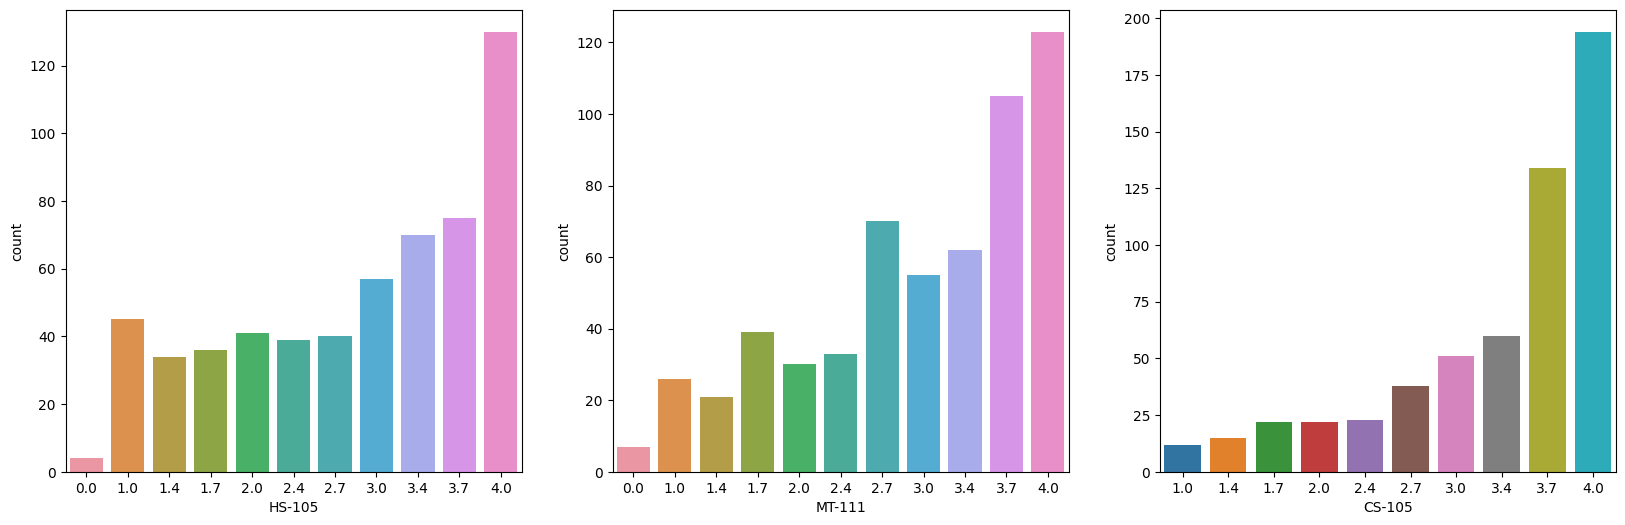

In [216]:
fig,axs = plt.subplots(1,3,figsize=(20,6))

sns.countplot(grades_data,x='HS-105',ax=axs[0])

sns.countplot(grades_data,x='MT-111',ax=axs[1])

sns.countplot(grades_data,x='CS-105',ax=axs[2])

* **From above each subplot,**

   1. **For course code HS-105, the highest student count is observed for grades 4.0 (A+) and 3.7 (A-), whereas notably fewer students received grades 0.0 (F) and 1.4 (D+).**
   2. **Regarding course code MT-111, the highest student count is for grades 3.7 (A-) and 2.7 (B-), while there's a lower count for grades 0.0 (F) and 1.4 (D+).**
   3. **Concerning course code CY-105, the highest student count is seen for grades 4.0 (A+) and 3.7 (A-), with a lower count for grades 1.0 (D) and 1.4 (D+).**

#### Chart - 3

### **Count of Seat Numbers for cource code 'CS-106', 'EL-102', 'EE-119'**

In [217]:
# Will get value count and average CGPA for each mentioned course code.

courses = ['CS-106', 'EL-102', 'EE-119']

# Creating dictionaries to hold average CGPA and value counts for each course
course_avg_cgpa = {}
course_value_counts = {}

for course in courses:
    course_avg_cgpa[course] = grades_data.groupby(course)['CGPA'].mean()

    course_value_counts[course] = grades_data[course].value_counts().sort_index()

for course in courses:
    print(f"Course: {course}")
    print(f"Average CGPA for {course}:")
    print(course_avg_cgpa[course])
    print("\nValue counts for {course}:")
    print(course_value_counts[course])
    print("\n")

Course: CS-106
Average CGPA for CS-106:
CS-106
0.0    1.731200
1.0    2.140583
1.4    2.406483
1.7    2.461000
2.0    2.652944
2.4    2.658780
2.7    2.779352
3.0    2.841083
3.4    3.147604
3.7    3.308526
4.0    3.494783
Name: CGPA, dtype: float64

Value counts for {course}:
0.0      5
1.0     24
1.4     29
1.7     27
2.0     18
2.4     41
2.7     54
3.0     96
3.4    101
3.7    116
4.0     60
Name: CS-106, dtype: int64


Course: EL-102
Average CGPA for EL-102:
EL-102
0.0    1.647833
1.0    2.237474
1.4    2.345174
1.7    2.294188
2.0    2.648133
2.4    2.547343
2.7    2.822358
3.0    2.994898
3.4    3.115362
3.7    3.161343
4.0    3.497446
Name: CGPA, dtype: float64

Value counts for {course}:
0.0      6
1.0     38
1.4     23
1.7     32
2.0     30
2.4     35
2.7     53
3.0     59
3.4     69
3.7    105
4.0    121
Name: EL-102, dtype: int64


Course: EE-119
Average CGPA for EE-119:
EE-119
0.0    1.326000
1.0    2.159000
1.4    2.111654
1.7    2.353423
2.0    2.363208
2.4    2.670921
2

<Axes: xlabel='EE-119', ylabel='count'>

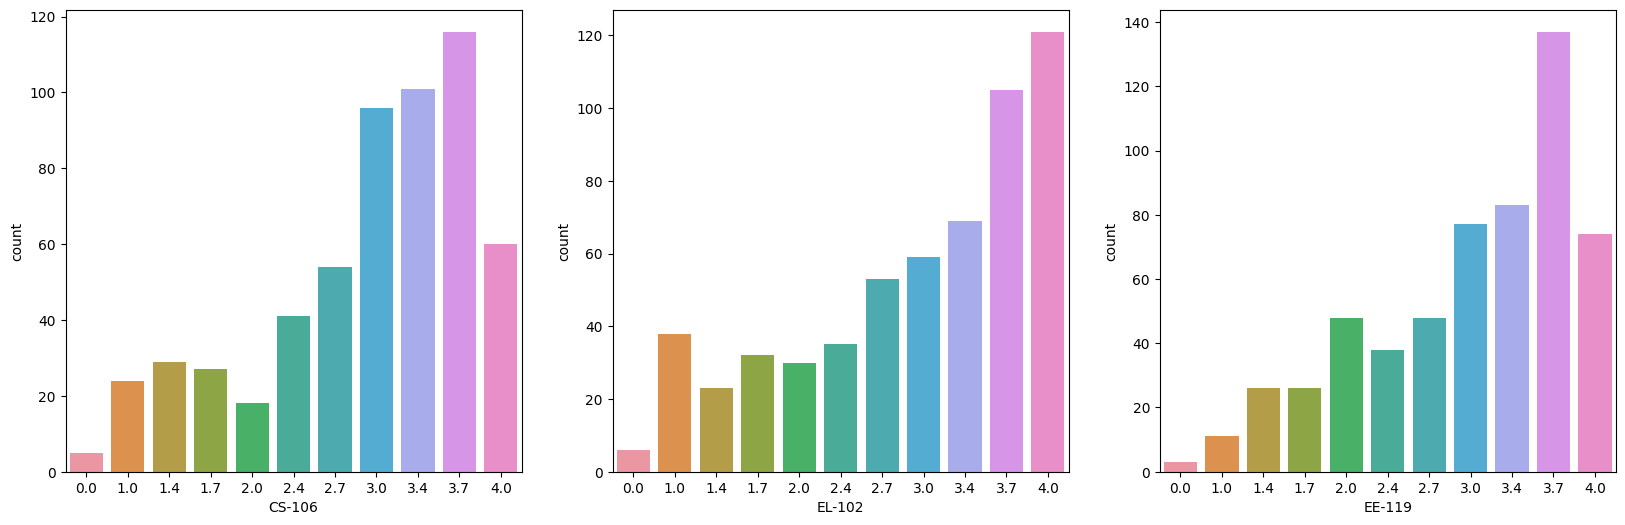

In [218]:
fig,axs = plt.subplots(1,3,figsize=(20,6))

sns.countplot(grades_data,x='CS-106',ax=axs[0])

sns.countplot(grades_data,x='EL-102',ax=axs[1])

sns.countplot(grades_data,x='EE-119',ax=axs[2])

* **From above each subplot,**

   1. **For course code CS-106, the highest student count is observed for grades 3.7 (A-) and 3.4 (B+), whereas notably fewer students received grades 0.0 (F) and 2.0 (C).**
   2. **Regarding course code EL-102, the highest student count is for grades 4.0 (A+) and 3.7 (A-), while there's a lower count for grades 0.0 (F) and 1.4 (D+).**
   3. **Concerning course code CY-105, the highest student count is seen for grades 3.7 (A-) and 3.4 (B+), with a lower count for grades 0.0 (F) and 1.0 (D).**

#### Chart - 4

### **Count of Seat Numbers for cource code 'ME-107', 'CS-107', 'HS-205','MT-222'**

<Axes: xlabel='MT-222', ylabel='count'>

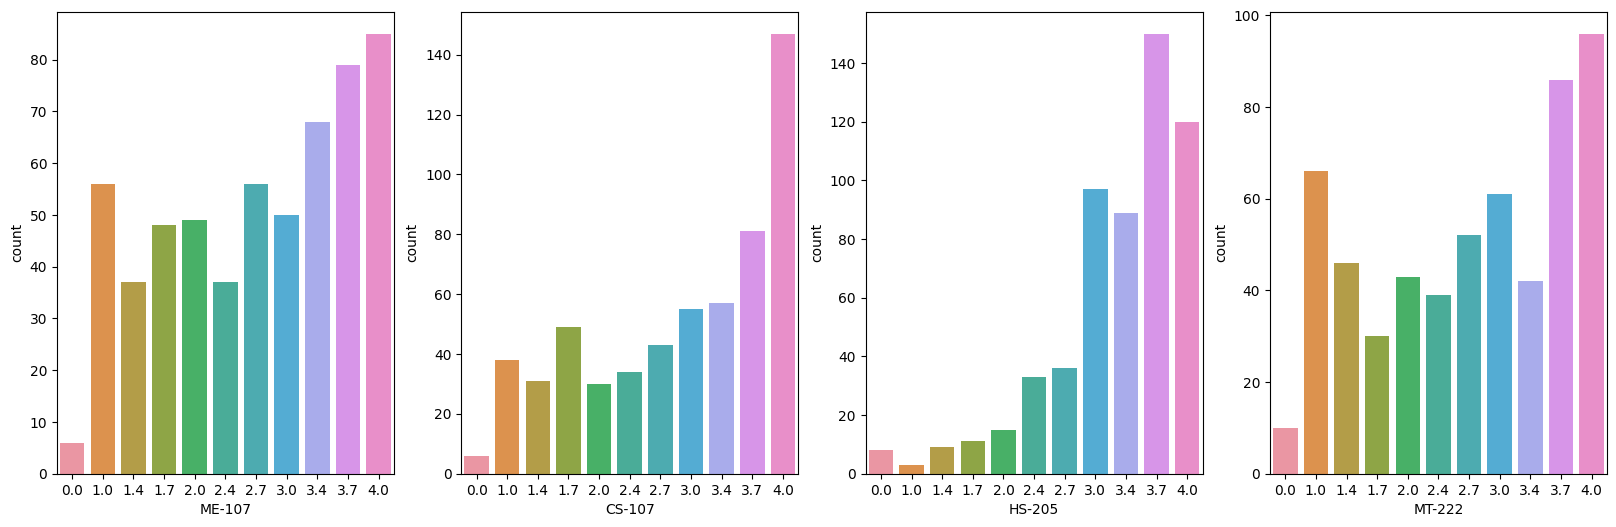

In [219]:
fig,axs = plt.subplots(1,4,figsize=(20,6))

sns.countplot(grades_data,x='ME-107',ax=axs[0])

sns.countplot(grades_data,x='CS-107',ax=axs[1])

sns.countplot(grades_data,x='HS-205',ax=axs[2])

sns.countplot(grades_data,x='MT-222',ax=axs[3])

* **From above each subplot,**

   1. **For course code ME-107, the highest student count is observed for grades 4.0 (A+) and 3.7 (A), whereas notably fewer students received grades 0.0 (F) and 2.4 (C+).**
   2. **Regarding course code CS-107, the highest student count is for grades 4.0 (A+) and 3.7 (A-), while there's a lower count for grades 0.0 (F) and 1.0 (D).**
   3. **Concerning course code HS-205, the highest student count is seen for grades 3.7 (A-) and 4.0 (A+), with a lower count for grades 1.0 (D) and 0.0 (F).**
   4. **For course code MT-222, the highest student count is observed for grades 4.0 (A+) and 3.7 (A-), whereas notably fewer students received grades 0.0 (F) and W**

#### Chart - 5

### **Count of Seat Numbers for cource code 'EE-222', 'MT-224', 'CS-210', 'CS-211'**

<Axes: xlabel='CS-211', ylabel='count'>

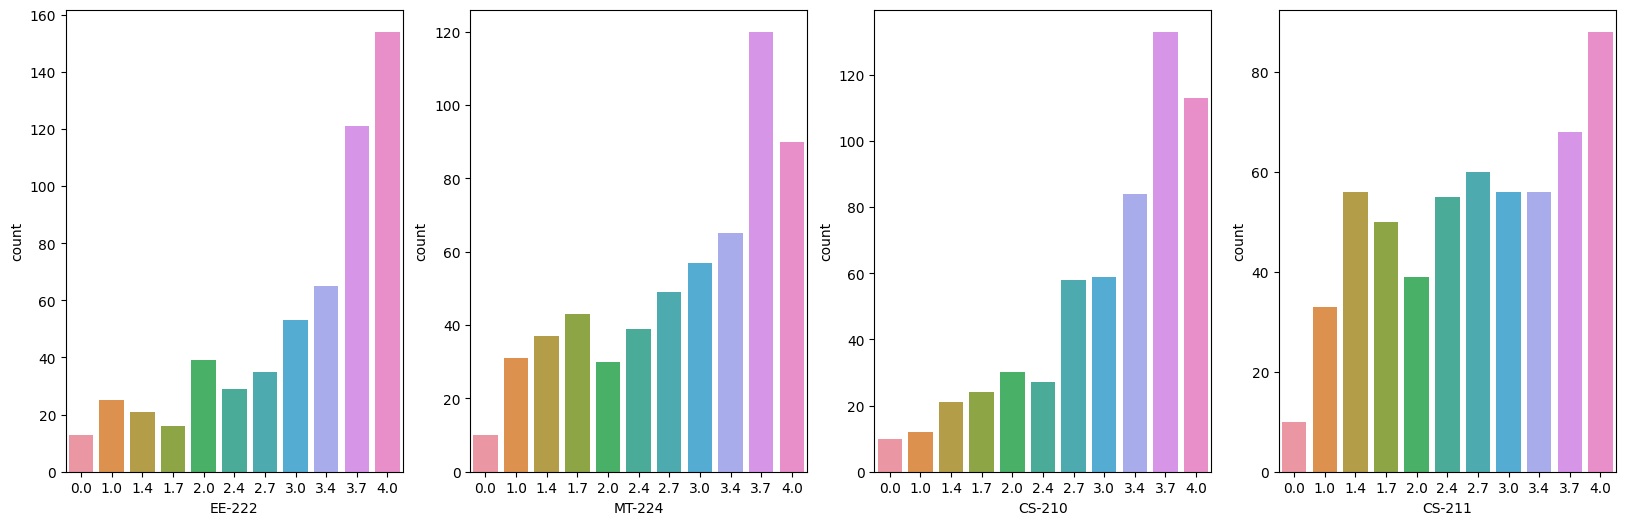

In [220]:
fig,axs = plt.subplots(1,4,figsize=(20,6))

sns.countplot(grades_data,x='EE-222',ax=axs[0])

sns.countplot(grades_data,x='MT-224',ax=axs[1])

sns.countplot(grades_data,x='CS-210',ax=axs[2])

sns.countplot(grades_data,x='CS-211',ax=axs[3])

* **From above each subplot,**

   1. **For course code EE-222, the highest student count is observed for grades 4.0 (A+) and 3.7 (A), whereas notably fewer students received grades 0.0 (F) and 2.4 (C+).**
   2. **Regarding course code MT-224, the highest student count is for grades 3.7 (A-) and 4.0 (A+), while there's a lower count for grades 0.0 (F) and W**
   3. **Concerning course code HS-205, the highest student count is seen for grades 3.7 (A-) and 4.0 (A+), with a lower count for grades 0.0 (F) and W**
   4. **For course code MT-222, the highest student count is observed for grades 4.0 (A+) and 3.7 (A-), whereas notably fewer students received grades 0.0 (F) and W**

#### Chart - 6

### **Count of Seat Numbers for cource code 'CS-203', 'CS-214', 'EE-217','CS-212'**

<Axes: xlabel='CS-212', ylabel='count'>

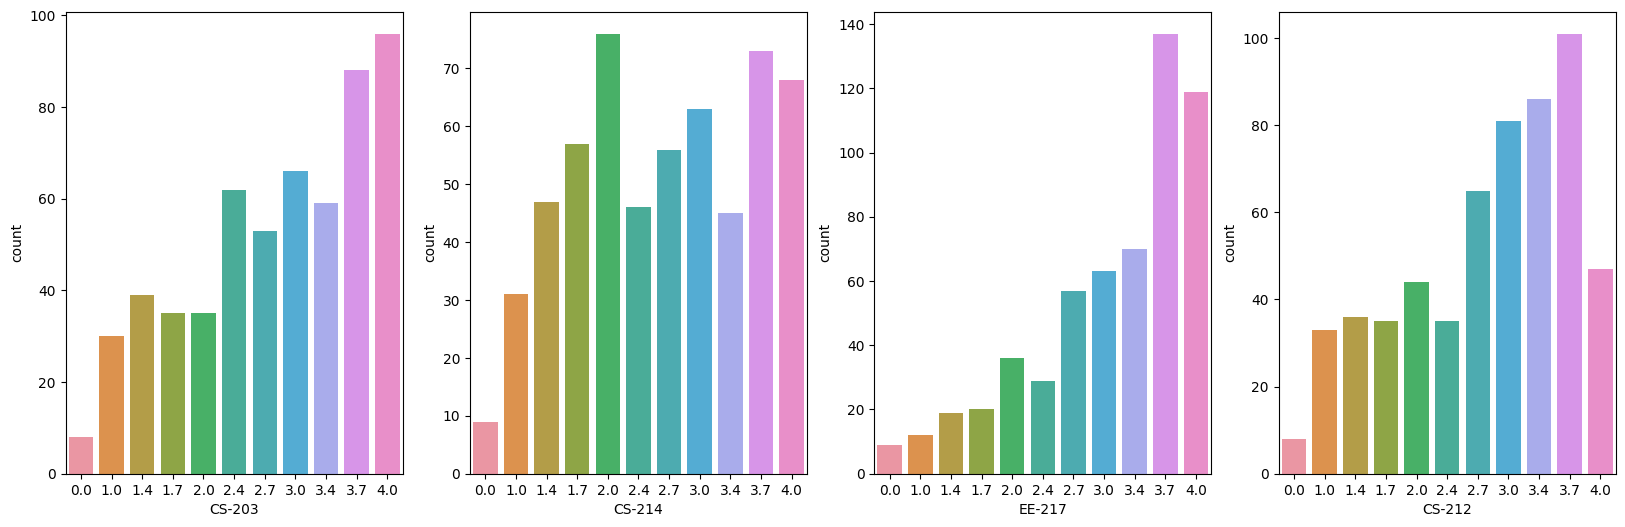

In [221]:
fig,axs = plt.subplots(1,4,figsize=(20,6))

sns.countplot(grades_data,x='CS-203',ax=axs[0])

sns.countplot(grades_data,x='CS-214',ax=axs[1])

sns.countplot(grades_data,x='EE-217',ax=axs[2])

sns.countplot(grades_data,x='CS-212',ax=axs[3])

* **From above each subplot,**

   1. **For course code CS-203, the highest student count is observed for grades 4.0 (A+) and 3.7 (A), whereas notably fewer students received grades 0.0 (F) and I**
   2. **Regarding course code CS-214, the highest student count is for grades 2.0 (C) and 3.7 (A), while there's a lower count for grades 0.0 (F) and I**
   3. **Concerning course code HS-205, the highest student count is seen for grades 3.7 (A-) and 4.0 (A+), with a lower count for grades 0.0 (F) and 1.0(D)**
   4. **For course code MT-222, the highest student count is observed for grades 3.7 (A-) and 3.4 (B+), whereas notably fewer students received grades 0.0 (F) and 1.0(D)**

#### Chart - 7

### **Count of Seat Numbers for cource code 'CS-215', 'MT-331', 'EF-303', 'HS-304'**

<Axes: xlabel='HS-304', ylabel='count'>

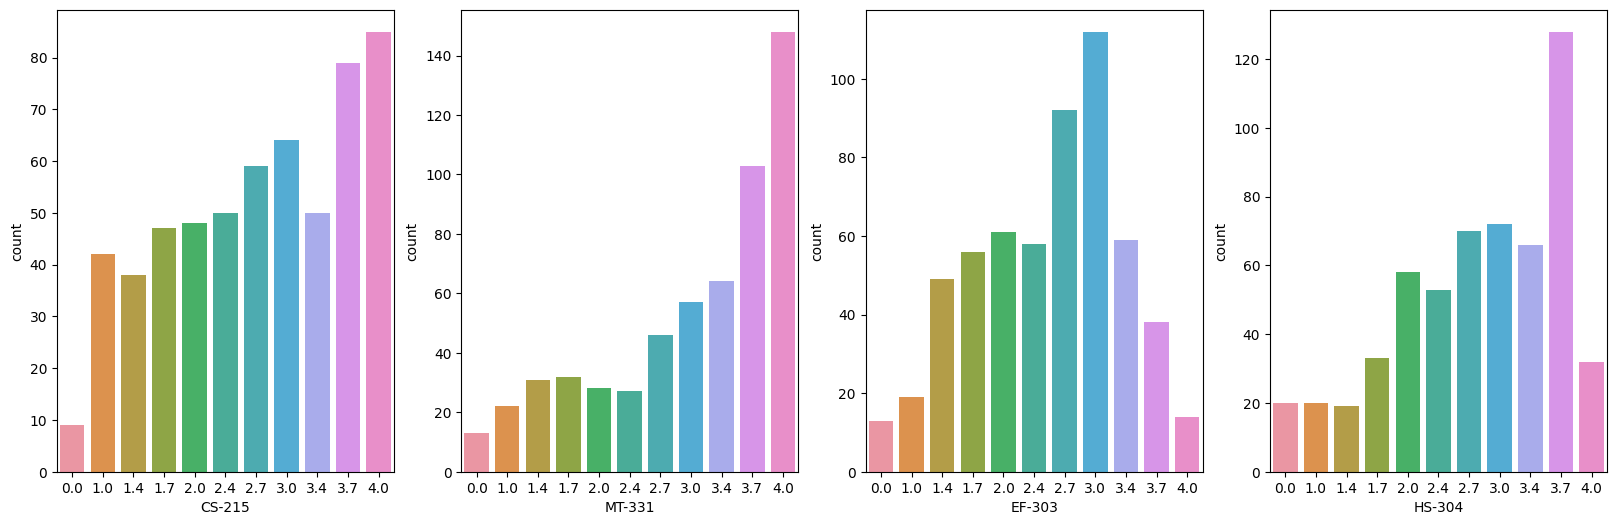

In [222]:
fig,axs = plt.subplots(1,4,figsize=(20,6))

sns.countplot(grades_data,x='CS-215',ax=axs[0])

sns.countplot(grades_data,x='MT-331',ax=axs[1])

sns.countplot(grades_data,x='EF-303',ax=axs[2])

sns.countplot(grades_data,x='HS-304',ax=axs[3])

* **From above each subplot,**

   1. **For course code CS-215, the highest student count is observed for grades 4.0 (A+) and 3.7 (A), whereas notably fewer students received grades 0.0 (F) and W**
   2. **Regarding course code MT-331, the highest student count is for grades 4.0 (A+) and 3.7 (A), while there's a lower count for grades 0.0 (F) and 1.0(D)**
   3. **Concerning course code E-303, the highest student count is seen for grades 3.0 (B) and 2.7 (B-), with a lower count for grades 0.0 (F) and 4.0(A+)**
   4. **For course code HS-304, the highest student count is observed for grades 3.7 (A-) and 3.0 (B), whereas notably fewer students received grades 0.0 (F) and W**

#### Chart - 8

### **Count of Seat Numbers for cource code 'CS-301', 'CS-302','TC-383', 'EL-332'**

<Axes: xlabel='EL-332', ylabel='count'>

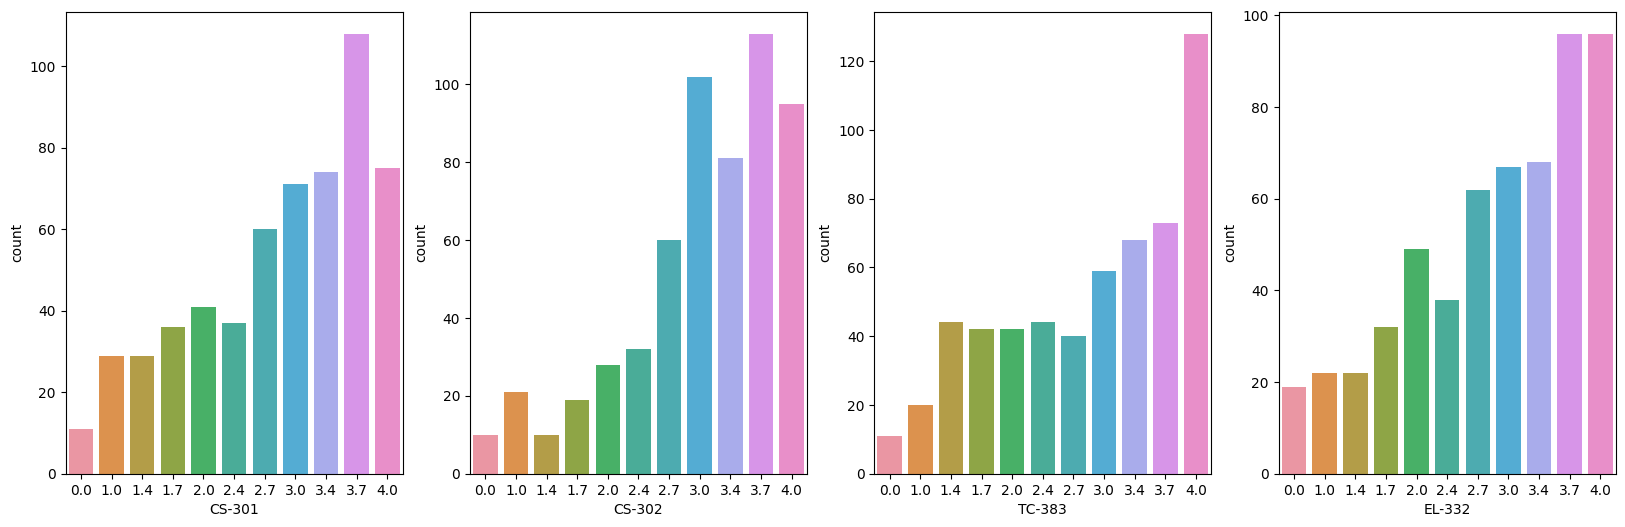

In [223]:
fig,axs = plt.subplots(1,4,figsize=(20,6))

sns.countplot(grades_data,x='CS-301',ax=axs[0])

sns.countplot(grades_data,x='CS-302',ax=axs[1])

sns.countplot(grades_data,x='TC-383',ax=axs[2])

sns.countplot(grades_data,x='EL-332',ax=axs[3])

* **From above each subplot,**

   1. **For course code CS-301, the highest student count is observed for grades 3.7 (A) and 4.0 (A+), whereas notably fewer students received grades 0.0 (F) and 1.0(D)**
   2. **Regarding course code CS-302, the highest student count is for grades 4.0 (A+) and 3.7 (A), while there's a lower count for grades 0.0 (F) and 1.4(D+)**
   3. **Concerning course code TC-383, the highest student count is seen for grades 4.0 (A+) and 3.7 (A), with a lower count for grades 0.0 (F) and 1.0(D)**
   4. **For course code EL-332, the highest student count is observed for grades 4.0 (A+) and 3.7 (A-), whereas notably fewer students received grades 0.0 (F) and 1.0(D)**

#### Chart - 9

### **Count of Seat Numbers for cource code 'CS-318', 'CS-306', 'CS-312', 'CS-317'**

<Axes: xlabel='CS-317', ylabel='count'>

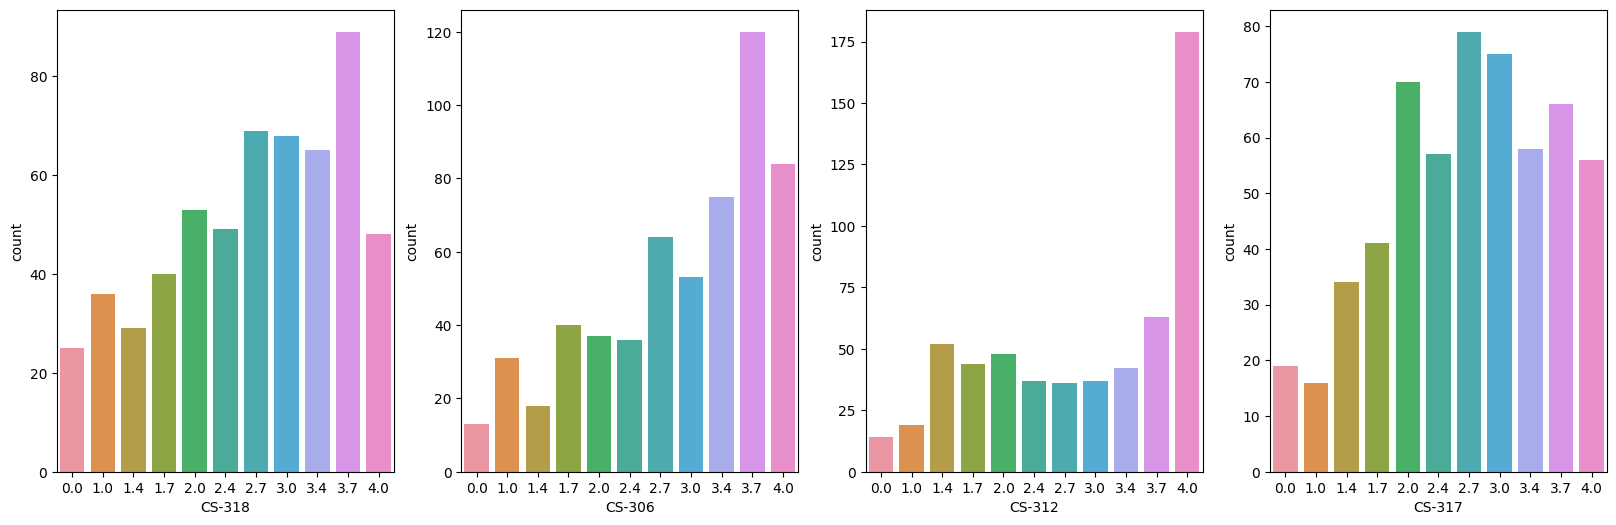

In [224]:
fig,axs = plt.subplots(1,4,figsize=(20,6))

sns.countplot(grades_data,x='CS-318',ax=axs[0])

sns.countplot(grades_data,x='CS-306',ax=axs[1])

sns.countplot(grades_data,x='CS-312',ax=axs[2])

sns.countplot(grades_data,x='CS-317',ax=axs[3])

* **From above each subplot,**

   1. **For course code CS-318, the highest student count is observed for grades 3.7 (A) and 2.7 (B-), whereas notably fewer students received grades 0.0 (F) and W**
   2. **Regarding course code CS-302, the highest student count is for grades 3.7 (A-) and 4.0 (A+), while there's a lower count for grades 0.0 (F) and 1.4(D+)**
   3. **Concerning course code CS-312, the highest student count is seen for grades 4.0 (A+) and 3.7 (A), with a lower count for grades 0.0 (F) and W**
   4. **For course code CS-317, the highest student count is observed for grades 2.7 (B-) and 3.0 (B), whereas notably fewer students received grades 0.0 (F) and 1.0(D)**

#### Chart - 10

### **Count of Seat Numbers for cource code 'MT-442','CS-403', 'CS-421', 'CS-406'**

<Axes: xlabel='CS-406', ylabel='count'>

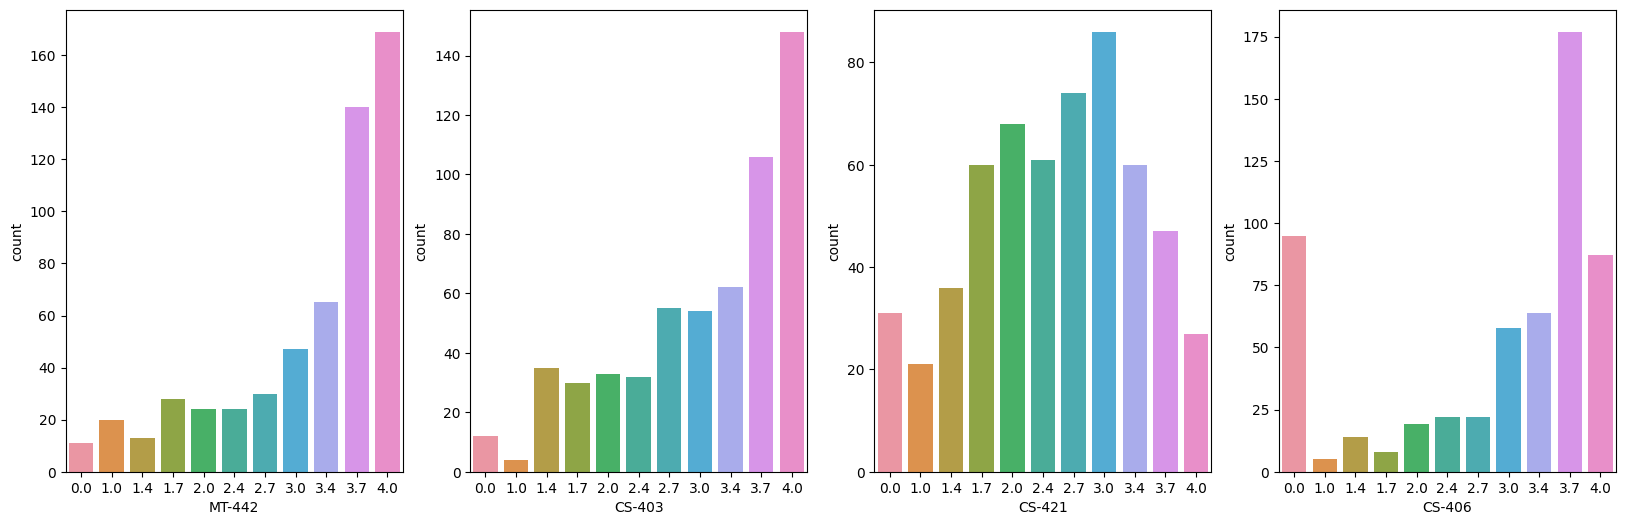

In [225]:
fig,axs = plt.subplots(1,4,figsize=(20,6))

sns.countplot(grades_data,x='MT-442',ax=axs[0])

sns.countplot(grades_data,x='CS-403',ax=axs[1])

sns.countplot(grades_data,x='CS-421',ax=axs[2])

sns.countplot(grades_data,x='CS-406',ax=axs[3])

* **From above each subplot,**

   1. **For course code MT-442, the highest student count is observed for grades 4.0 (A+) and 3.7 (A-), whereas notably fewer students received grades 0.0 (F) and 1.4(D+)**
   2. **Regarding course code CS-403, the highest student count is for grades 4.0 (A+) and 3.7 (A-), while there's a lower count for grades 0.0 (F) and 1.0(D)**
   3. **Concerning course code CS-421, the highest student count is seen for grades 3.0 (B) and 2.7 (B-), with a lower count for grades 1.0 (D) and W**
   4. **For course code CS-406, the highest student count is observed for grades 3.7 (A-) and 0.0 (F), whereas notably fewer students received grades 1.0 (D) and W**

#### Chart - 11

### **Count of Seat Numbers for cource code 'CS-414', 'CS-419', 'CS-423', 'CS-412'**

<Axes: xlabel='CS-412', ylabel='count'>

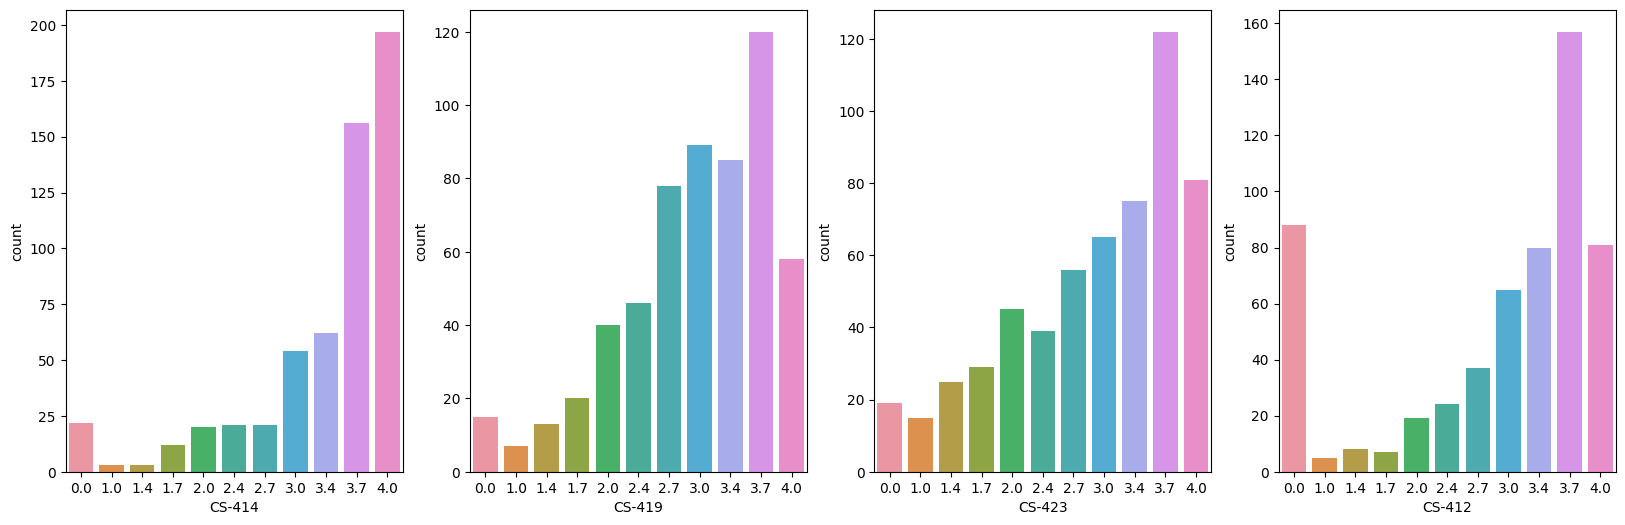

In [226]:
fig,axs = plt.subplots(1,4,figsize=(20,6))

sns.countplot(grades_data,x='CS-414',ax=axs[0])

sns.countplot(grades_data,x='CS-419',ax=axs[1])

sns.countplot(grades_data,x='CS-423',ax=axs[2])

sns.countplot(grades_data,x='CS-412',ax=axs[3])

* **From above each subplot,**

   1. **For course code CS-414, the highest student count is observed for grades 4.0 (A+) and 3.7 (A-), whereas notably fewer students received grades 1.0 (D) and W**
   2. **Regarding course code CS-419, the highest student count is for grades 3.7 (A-) and 3.0 (B), while there's a lower count for grades 1.0 (D) and 1.4(D+)**
   3. **Concerning course code CS-423, the highest student count is seen for grades 3.7 (A-) and 4.0 (A+), with a lower count for grades 0.0 (F) and 1.0(D)**
   4. **For course code CS-412, the highest student count is observed for grades 3.7 (A-) and 0.0 (F), whereas notably fewer students received grades 1.0 (D) and W**

## **Heatmap**

<ipython-input-227-8c5395578256>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = correlation_data.corr()


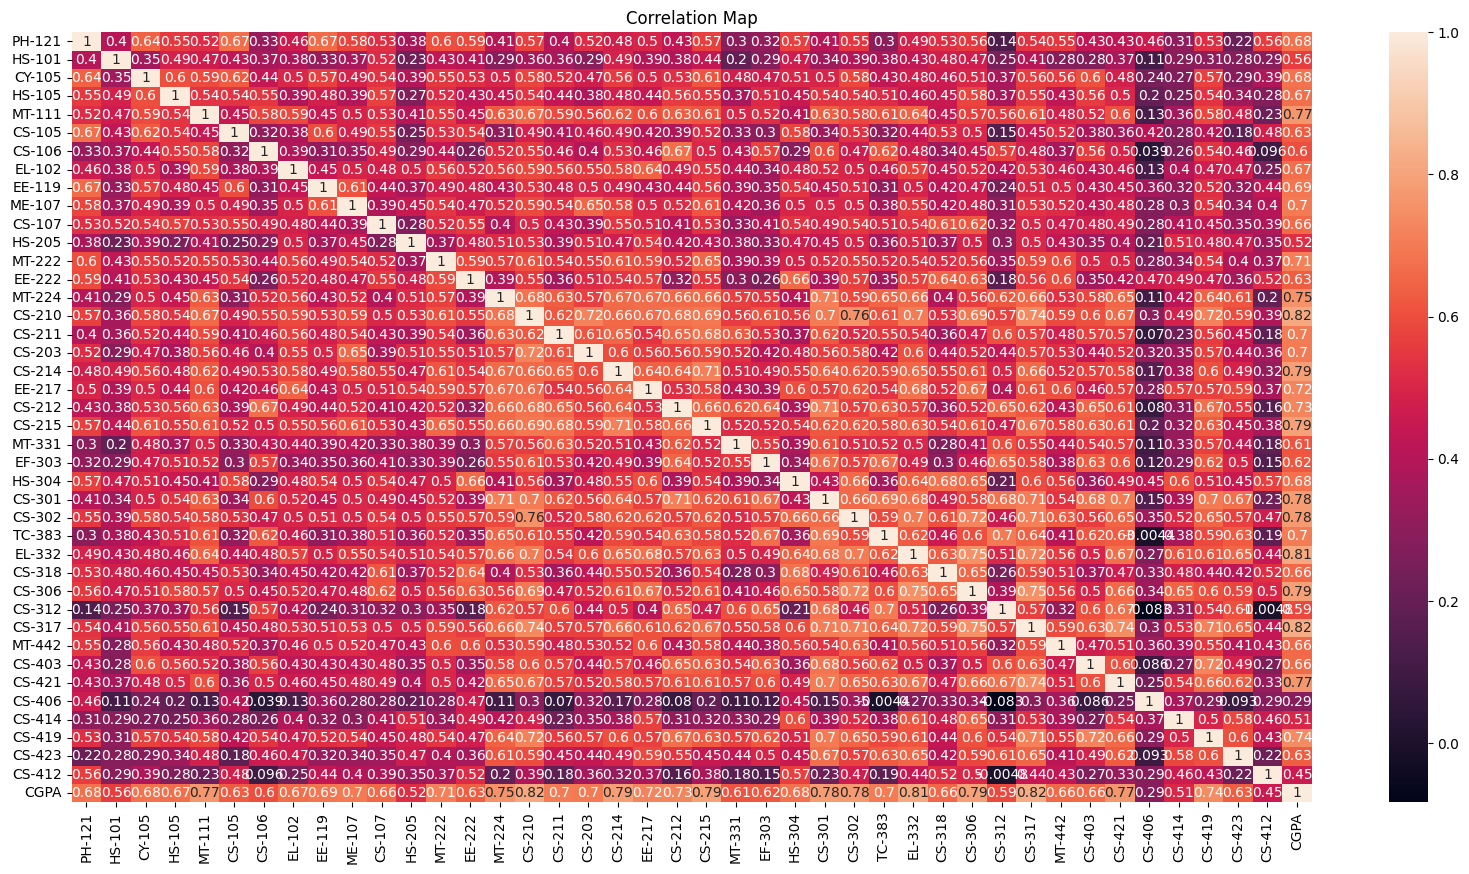

In [227]:
correlation_data = grades_data

correlation_matrix = correlation_data.corr()

plt.figure(figsize=(20,10))

sns.heatmap(correlation_matrix,annot=True)
plt.title('Correlation Map')
plt.show()



### **Pair Plot**

In [228]:
sns.pairplot(grades_data)

plt.show()

KeyboardInterrupt: ignored

Error in callback <function _draw_all_if_interactive at 0x7fd9ed0fe050> (for post_execute):


KeyboardInterrupt: ignored

Error in callback <function flush_figures at 0x7fd9ed0fd2d0> (for post_execute):


KeyboardInterrupt: ignored

In [229]:
grades_data.columns

Index(['Seat_no', 'PH-121', 'HS-101', 'CY-105', 'HS-105', 'MT-111', 'CS-105',
       'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205', 'MT-222',
       'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214', 'EE-217',
       'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301', 'CS-302',
       'TC-383', 'EL-332', 'CS-318', 'CS-306', 'CS-312', 'CS-317', 'MT-442',
       'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423', 'CS-412',
       'CGPA'],
      dtype='object')


#### KDE plot For all columns

<ipython-input-230-44703309d835>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_columns[column])
<ipython-input-230-44703309d835>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_columns[column])
<ipython-input-230-44703309d835>:14: UserWarning: 

`distplot` is a deprecated function 

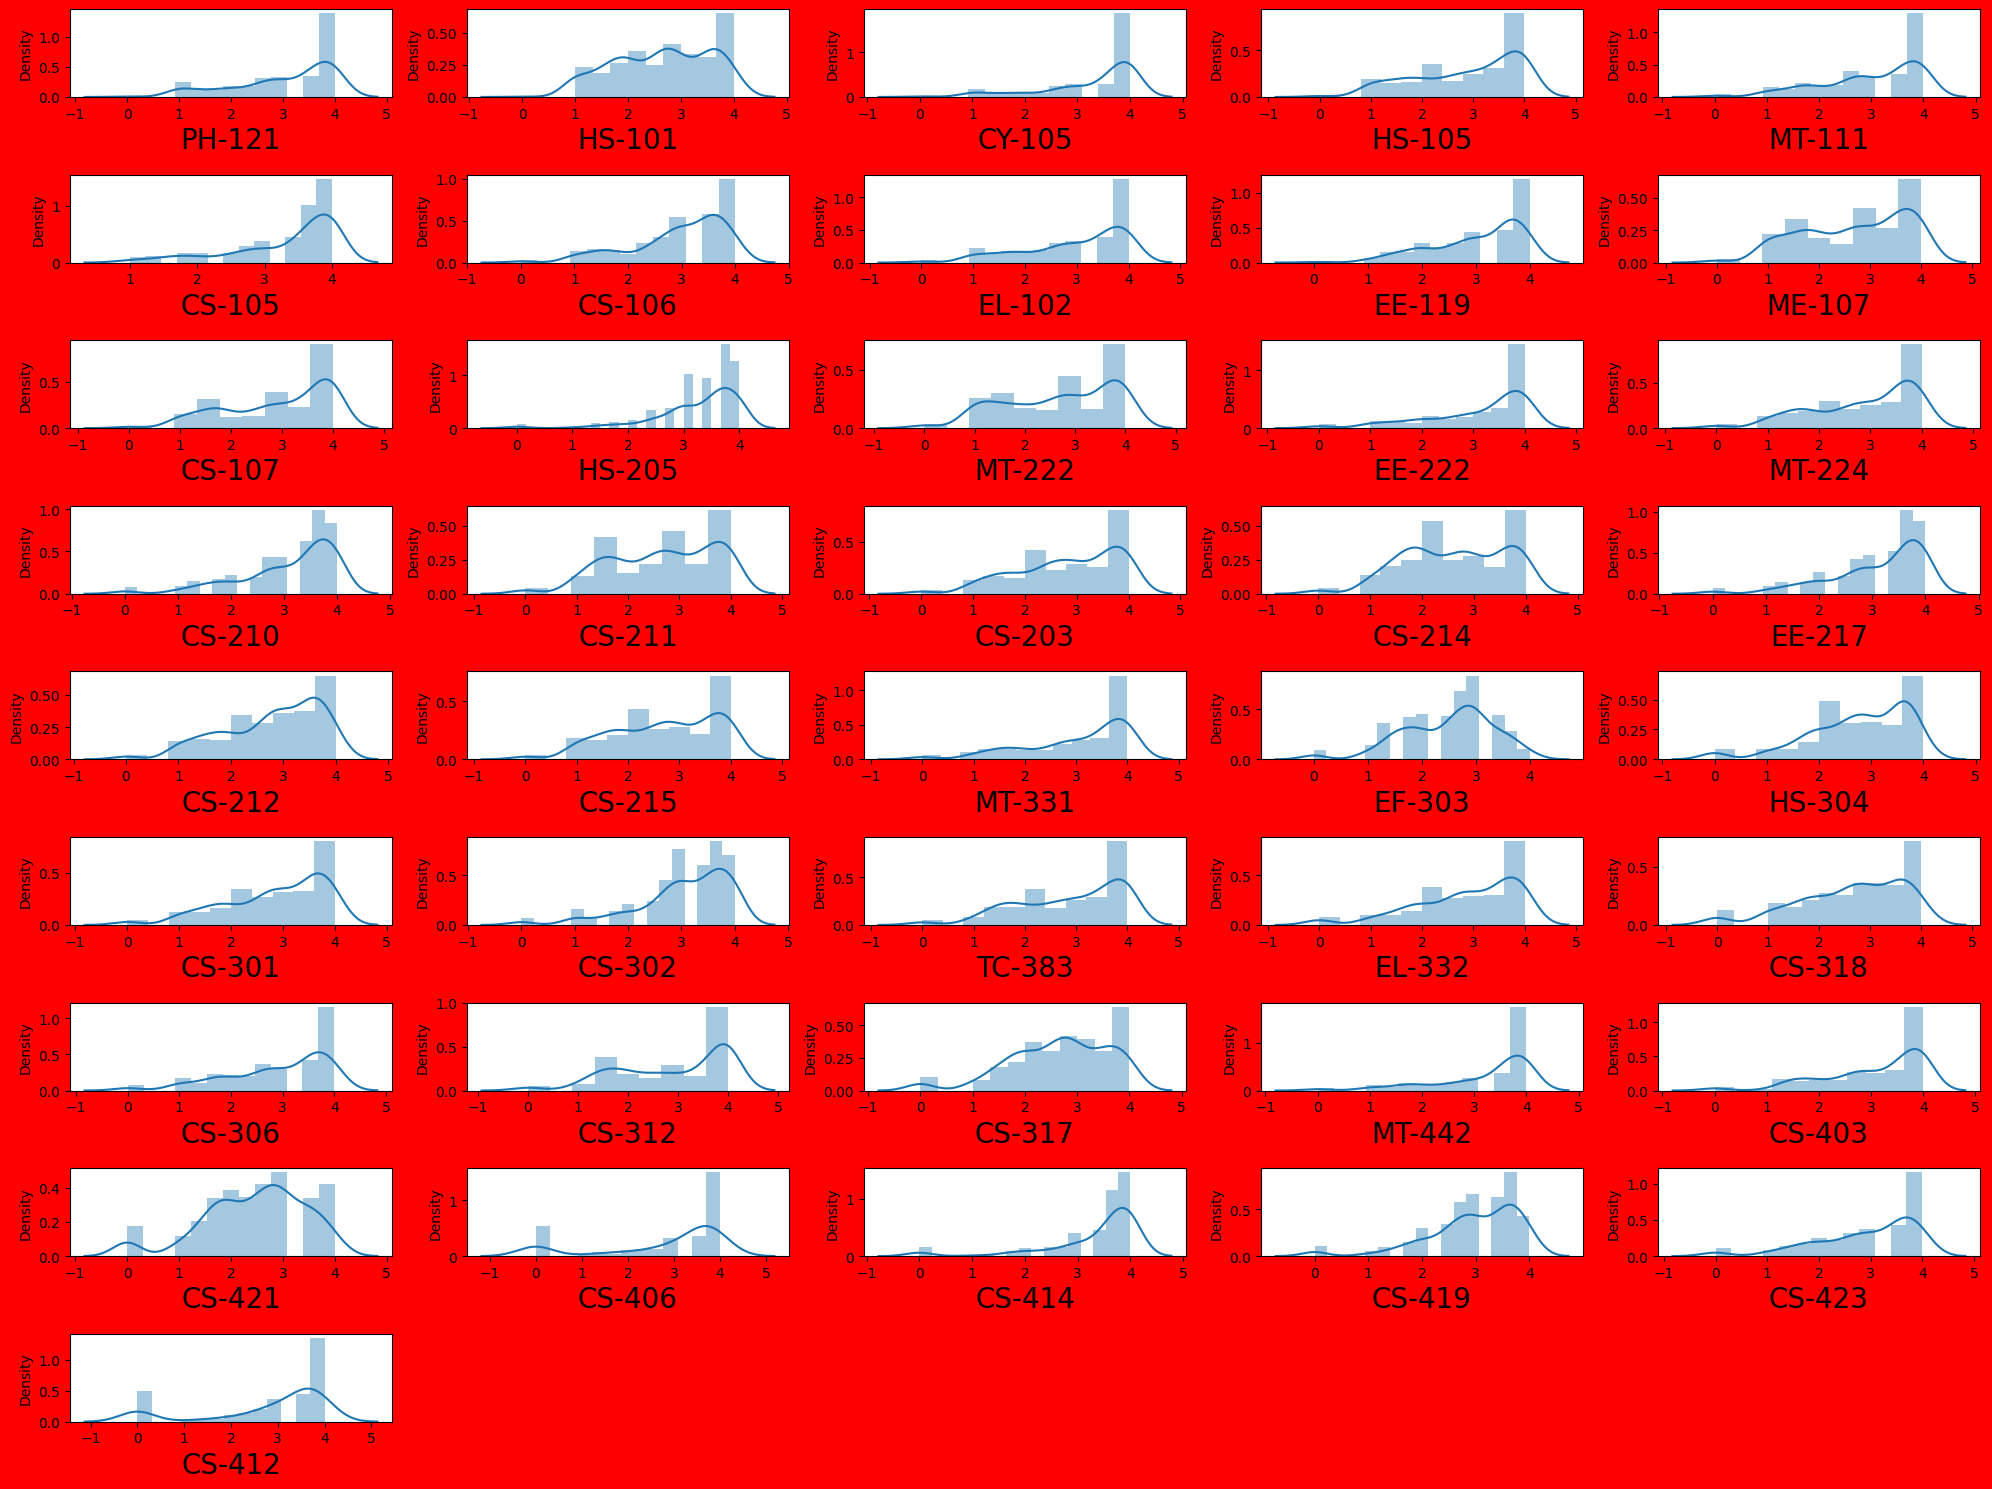

In [230]:
num_columns = grades_data[['PH-121', 'HS-101', 'CY-105', 'HS-105', 'MT-111', 'CS-105',
       'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205', 'MT-222',
       'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214', 'EE-217',
       'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301', 'CS-302',
       'TC-383', 'EL-332', 'CS-318', 'CS-306', 'CS-312', 'CS-317', 'MT-442',
       'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423', 'CS-412']]

plt.figure(figsize=(20,15),facecolor='red')
plotnumber=1

for column in num_columns:
  if plotnumber<=45:
    ax=plt.subplot(9,5,plotnumber)
    sns.distplot(num_columns[column])
    plt.xlabel(column,fontsize=20)
  plotnumber+=1
plt.tight_layout()

## **ML Model Implementation**

### ML Model - 1

#### Linear regression

In [231]:
# Importing Necessary Libraries

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Ridge
import math

Shape of x_train (399, 41)
Shape of x_test (172, 41)
Shape of y_train (399,)
Shape of y_train (172,)
Linear Regression MSE For Model 1:  0.0146459886611635
Linear Regression RMSE For Model 1:  0.1210206125466381
Linear Regression R-squared For Model 1:  0.9579167057947054


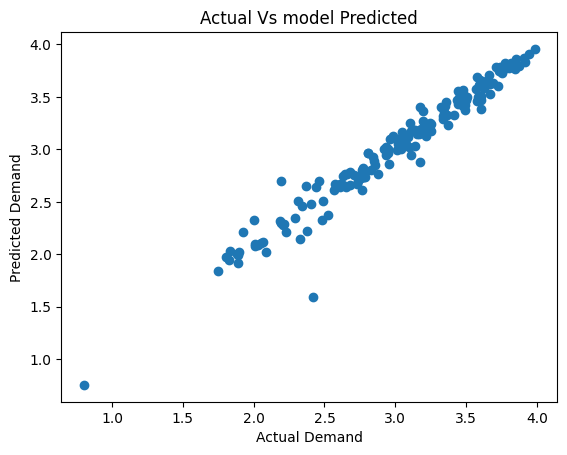

In [232]:
x = grades_data[['PH-121', 'HS-101', 'CY-105', 'HS-105', 'MT-111', 'CS-105',
       'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205', 'MT-222',
       'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214', 'EE-217',
       'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301', 'CS-302',
       'TC-383', 'EL-332', 'CS-318', 'CS-306', 'CS-312', 'CS-317', 'MT-442',
       'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423', 'CS-412']]

y = grades_data['CGPA']

# splitting data into train and test set.

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=248)

print("Shape of x_train",x_train.shape)
print("Shape of x_test",x_test.shape)
print("Shape of y_train",y_train.shape)
print("Shape of y_train",y_test.shape)

# Transforming data standardization

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

# Fitting linear regressio to training set
LR = LinearRegression()
LR.fit(x_train, y_train)

# Predicting on test set results

y_pred = LR.predict(x_test)

y_pred

# Evaluate the Linear Regression model
LR_predictions = LR.predict(x_test)
LR_mse = mean_squared_error(y_test, LR_predictions)
LR_RMSE = math.sqrt(mean_squared_error(y_test,y_pred))
LR_r2 = r2_score(y_test, LR_predictions)
print("Linear Regression MSE For Model 1: ", LR_mse)
print("Linear Regression RMSE For Model 1: ", LR_RMSE)
print("Linear Regression R-squared For Model 1: ", LR_r2)


plt.scatter(y_test,y_pred)
plt.xlabel('Actual Demand')
plt.ylabel('Predicted Demand')
plt.title('Actual Vs model Predicted')
plt.show()

**Insights from ML Model 1:**

1. The MSE for Model 1 is 0.0146. Lower MSE indicates better fit; in this case, the model's average squared error between predicted and actual values is quite small.
2. The RMSE for Model 1 is 0.121. RMSE is the square root of MSE and measures the average magnitude of errors. It appears to be relatively low, suggesting the model's predictions are generally close to the actual values.
3. The R-squared value for Model 1 is 0.958, indicating the proportion of variance in the dependent variable (target) explained by the independent variables (features). A value closer to 1 signifies a better fit.



In [233]:
# Importing Necessary Libraries

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge

# Lasso Regression model with hyperparameter tuning
lasso_model = Lasso()
lasso_param_grid = {'alpha': [0.01, 0.1, 1, 10]}
lasso_grid = GridSearchCV(lasso_model, lasso_param_grid, cv=5)
lasso_grid.fit(x_train, y_train)

# Evaluate the Lasso Regression model
lasso_predictions = lasso_grid.predict(x_test)
lasso_mse = mean_squared_error(y_test, lasso_predictions)
lasso_r2 = r2_score(y_test, lasso_predictions)
print("Lasso Regression MSE: ", lasso_mse)
print("Lasso Regression R-squared: ", lasso_r2)
print("Best Lasso Alpha: ", lasso_grid.best_params_['alpha'])


# Similarly for ridge regression

# Ridge Regression model with hyperparameter tuning
ridge_model = Ridge()
ridge_param_grid = {'alpha': [0.01, 0.1, 1, 10]}
ridge_grid = GridSearchCV(ridge_model, ridge_param_grid, cv=5)
ridge_grid.fit(x_train, y_train)

# Evaluate the Ridge Regression model
ridge_predictions = ridge_grid.predict(x_test)
ridge_mse = mean_squared_error(y_test, ridge_predictions)
ridge_r2 = r2_score(y_test, ridge_predictions)
print("Ridge Regression MSE: ", ridge_mse)
print("Ridge Regression R-squared: ", ridge_r2)
print("Best Ridge Alpha: ", ridge_grid.best_params_['alpha'])

Lasso Regression MSE:  0.019170083207307717
Lasso Regression R-squared:  0.9449173237657676
Best Lasso Alpha:  0.01
Ridge Regression MSE:  0.01588072094227876
Ridge Regression R-squared:  0.954368867335105
Best Ridge Alpha:  10


**Ridge regression shows slightly better performance in terms of MSE and R-squared compared to Lasso regression. This implies that Ridge might be better at fitting the data.Lasso with a smaller alpha of 0.01 and Ridge with a larger alpha of 10 indicate different levels of regularization. Lasso, being a feature selection method, might have eliminated some less impactful variables due to its stronger regularization.**

### ML Model - 2

### Considering subjects of only 1st year

Shape of x_train (399, 11)
Shape of x_test (172, 11)
Shape of y_train (399,)
Shape of y_train (172,)
Linear Regression MSE For Model 2:  0.051468854255514104
Linear Regression RMSE For Model 2:  0.22686748170576165
Linear Regression R-squared For Model 2:  0.8521111147800001


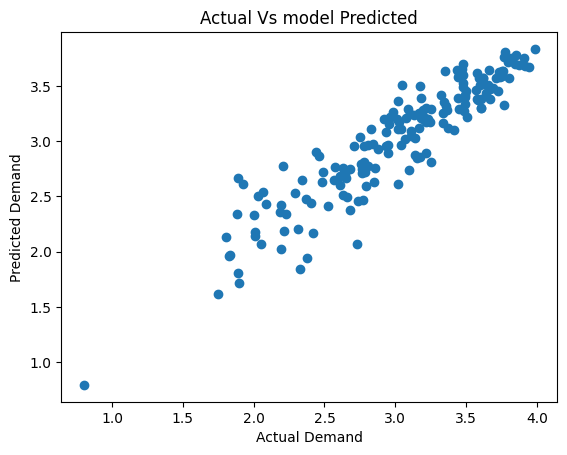

Lasso Regression MSE for ML Model 2:  0.056143991381332824
Lasso Regression R-squared for ML Model 2:  0.8386777320519614
Best Lasso Alpha For ML Model 2:  0.01
Ridge Regression MSE For ML Model 2:  0.05142362681415951
Ridge Regression R-squared For ML Model 2:  0.8522410697980403
Best Ridge Alpha For ML Model 2:  1


In [234]:
x = grades_data[['PH-121', 'HS-101', 'CY-105', 'HS-105', 'MT-111', 'CS-105',
       'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107']]

y = grades_data['CGPA']

# splitting data into train and test set.

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=248)

print("Shape of x_train",x_train.shape)
print("Shape of x_test",x_test.shape)
print("Shape of y_train",y_train.shape)
print("Shape of y_train",y_test.shape)

# Transforming data standardization

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

# Fitting linear regressio to training set
LR = LinearRegression()
LR.fit(x_train, y_train)

# Predicting on test set results

y_pred = LR.predict(x_test)

y_pred

# Evaluate the Linear Regression model
LR_predictions = LR.predict(x_test)
LR_mse = mean_squared_error(y_test, LR_predictions)
LR_RMSE = math.sqrt(mean_squared_error(y_test,y_pred))
LR_r2 = r2_score(y_test, LR_predictions)
print("Linear Regression MSE For Model 2: ", LR_mse)
print("Linear Regression RMSE For Model 2: ", LR_RMSE)
print("Linear Regression R-squared For Model 2: ", LR_r2)


plt.scatter(y_test,y_pred)
plt.xlabel('Actual Demand')
plt.ylabel('Predicted Demand')
plt.title('Actual Vs model Predicted')
plt.show()

# Will check for Lasso and ridge regression on model for better performance

# Lasso Regression model with hyperparameter tuning
lasso_model = Lasso()
lasso_param_grid = {'alpha': [0.01, 0.1, 1, 10]}
lasso_grid = GridSearchCV(lasso_model, lasso_param_grid, cv=5)
lasso_grid.fit(x_train, y_train)

# Evaluate the Lasso Regression model
lasso_predictions = lasso_grid.predict(x_test)
lasso_mse = mean_squared_error(y_test, lasso_predictions)
lasso_r2 = r2_score(y_test, lasso_predictions)
print("Lasso Regression MSE for ML Model 2: ", lasso_mse)
print("Lasso Regression R-squared for ML Model 2: ", lasso_r2)
print("Best Lasso Alpha For ML Model 2: ", lasso_grid.best_params_['alpha'])

# Doing regularization with lasso and ridge regression

# Ridge Regression model with hyperparameter tuning
ridge_model = Ridge()
ridge_param_grid = {'alpha': [0.01, 0.1, 1, 10]}
ridge_grid = GridSearchCV(ridge_model, ridge_param_grid, cv=5)
ridge_grid.fit(x_train, y_train)

# Evaluate the Ridge Regression model
ridge_predictions = ridge_grid.predict(x_test)
ridge_mse = mean_squared_error(y_test, ridge_predictions)
ridge_r2 = r2_score(y_test, ridge_predictions)
print("Ridge Regression MSE For ML Model 2: ", ridge_mse)
print("Ridge Regression R-squared For ML Model 2: ", ridge_r2)
print("Best Ridge Alpha For ML Model 2: ", ridge_grid.best_params_['alpha'])

**Insights from linear Model 2:**

MSE: 0.0514
RMSE: 0.2269
R-squared: 0.8521
It explains around 85.2% of the variance and has a moderate error rate.

Lasso Regression: Slightly lower performance:
MSE: 0.0561
R-squared: 0.8387
Best Alpha: 0.01
Penalizes coefficients more, offering some feature selection.

Ridge Regression: Performance similar to Linear Regression:
MSE: 0.0514
R-squared: 0.8522
Best Alpha: 1
Moderate regularization without eliminating coefficients.

**Linear and Ridge regressions show similar performance, explaining about 85.2%**

### ML Model - 3

### Considering subjects of only 2nd year

Shape of x_train (399, 11)
Shape of x_test (172, 11)
Shape of y_train (399,)
Shape of y_train (172,)
Linear Regression MSE For Model 3:  0.05602293438336937
Linear Regression RMSE For Model 3:  0.2366916440928352
Linear Regression R-squared For Model 3:  0.8390255731829883


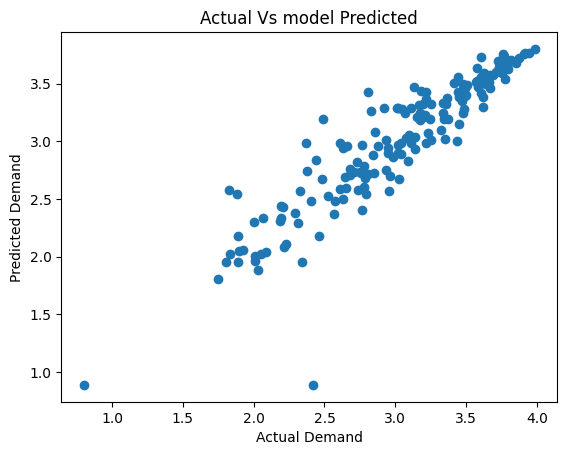

Lasso Regression MSE for ML Model 3:  0.05748977050188009
Lasso Regression R-squared for ML Model 3:  0.8348108153162199
Best Lasso Alpha For ML Model 3:  0.01
Ridge Regression MSE For ML Model 3:  0.055527175558071636
Ridge Regression R-squared For ML Model 3:  0.8404500700184391
Best Ridge Alpha For ML Model 3:  1


In [235]:
x = grades_data[['HS-205', 'MT-222',
       'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214', 'EE-217',
       'CS-212', 'CS-215']]

y = grades_data['CGPA']

# splitting data into train and test set.

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=248)

print("Shape of x_train",x_train.shape)
print("Shape of x_test",x_test.shape)
print("Shape of y_train",y_train.shape)
print("Shape of y_train",y_test.shape)

# Transforming data standardization

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

# Fitting linear regressio to training set
LR = LinearRegression()
LR.fit(x_train, y_train)

# Predicting on test set results

y_pred = LR.predict(x_test)

y_pred

# Evaluate the Linear Regression model
LR_predictions = LR.predict(x_test)
LR_mse = mean_squared_error(y_test, LR_predictions)
LR_RMSE = math.sqrt(mean_squared_error(y_test,y_pred))
LR_r2 = r2_score(y_test, LR_predictions)
print("Linear Regression MSE For Model 3: ", LR_mse)
print("Linear Regression RMSE For Model 3: ", LR_RMSE)
print("Linear Regression R-squared For Model 3: ", LR_r2)


plt.scatter(y_test,y_pred)
plt.xlabel('Actual Demand')
plt.ylabel('Predicted Demand')
plt.title('Actual Vs model Predicted')
plt.show()

# Will check for Lasso and ridge regression on model for better performance

# Lasso Regression model with hyperparameter tuning
lasso_model = Lasso()
lasso_param_grid = {'alpha': [0.01, 0.1, 1, 10]}
lasso_grid = GridSearchCV(lasso_model, lasso_param_grid, cv=5)
lasso_grid.fit(x_train, y_train)

# Evaluate the Lasso Regression model
lasso_predictions = lasso_grid.predict(x_test)
lasso_mse = mean_squared_error(y_test, lasso_predictions)
lasso_r2 = r2_score(y_test, lasso_predictions)
print("Lasso Regression MSE for ML Model 3: ", lasso_mse)
print("Lasso Regression R-squared for ML Model 3: ", lasso_r2)
print("Best Lasso Alpha For ML Model 3: ", lasso_grid.best_params_['alpha'])

# Doing regularization with lasso and ridge regression

# Ridge Regression model with hyperparameter tuning
ridge_model = Ridge()
ridge_param_grid = {'alpha': [0.01, 0.1, 1, 10]}
ridge_grid = GridSearchCV(ridge_model, ridge_param_grid, cv=5)
ridge_grid.fit(x_train, y_train)

# Evaluate the Ridge Regression model
ridge_predictions = ridge_grid.predict(x_test)
ridge_mse = mean_squared_error(y_test, ridge_predictions)
ridge_r2 = r2_score(y_test, ridge_predictions)
print("Ridge Regression MSE For ML Model 3: ", ridge_mse)
print("Ridge Regression R-squared For ML Model 3: ", ridge_r2)
print("Best Ridge Alpha For ML Model 3: ", ridge_grid.best_params_['alpha'])

**Insights from linar model 3:**

Linear Regression Performance:
Mean Squared Error (MSE): 0.056
Root Mean Squared Error (RMSE): 0.237
R-squared: 0.839
**Insight:** The linear regression model explains approximately 83.9% of the variance in the dependent variable.

Lasso Regression Performance:
MSE: 0.057
R-squared: 0.835
Best Alpha: 0.01
**Insight:** Lasso regression performs slightly lower than linear regression with a slightly higher MSE and a similar R-squared value.

Ridge Regression Performance:
MSE: 0.056
R-squared: 0.840
Best Alpha: 1
**Insight:** Ridge regression yields results comparable to linear regression but with a slightly lower MSE and a slightly better R-squared value.

### ML Model - 4

### Considering subjects of only 3rd year

Shape of x_train (399, 11)
Shape of x_test (172, 11)
Shape of y_train (399,)
Shape of y_train (172,)
Linear Regression MSE For Model 4:  0.05166467837965144
Linear Regression RMSE For Model 4:  0.22729865459269977
Linear Regression R-squared For Model 4:  0.8515484402880815


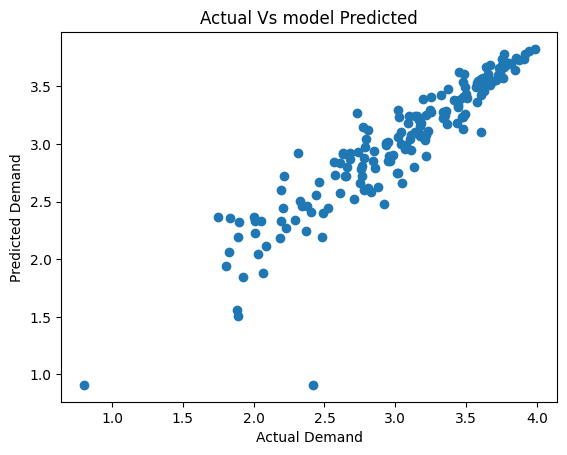

Lasso Regression MSE for ML Model 4:  0.05517245358196021
Lasso Regression R-squared for ML Model 4:  0.8414693162862834
Best Lasso Alpha For ML Model 4:  0.01
Ridge Regression MSE For ML Model 4:  0.05095987632799088
Ridge Regression R-squared For ML Model 4:  0.8535735949418726
Best Ridge Alpha For ML Model 4:  1


In [236]:
x = grades_data[['MT-331', 'EF-303', 'HS-304', 'CS-301', 'CS-302',
       'TC-383', 'EL-332', 'CS-318', 'CS-306', 'CS-312', 'CS-317']]

y = grades_data['CGPA']

# splitting data into train and test set.

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=248)

print("Shape of x_train",x_train.shape)
print("Shape of x_test",x_test.shape)
print("Shape of y_train",y_train.shape)
print("Shape of y_train",y_test.shape)

# Transforming data standardization

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

# Fitting linear regressio to training set
LR = LinearRegression()
LR.fit(x_train, y_train)

# Predicting on test set results

y_pred = LR.predict(x_test)

y_pred

# Evaluate the Linear Regression model
LR_predictions = LR.predict(x_test)
LR_mse = mean_squared_error(y_test, LR_predictions)
LR_RMSE = math.sqrt(mean_squared_error(y_test,y_pred))
LR_r2 = r2_score(y_test, LR_predictions)
print("Linear Regression MSE For Model 4: ", LR_mse)
print("Linear Regression RMSE For Model 4: ", LR_RMSE)
print("Linear Regression R-squared For Model 4: ", LR_r2)


plt.scatter(y_test,y_pred)
plt.xlabel('Actual Demand')
plt.ylabel('Predicted Demand')
plt.title('Actual Vs model Predicted')
plt.show()

# Will check for Lasso and ridge regression on model for better performance

# Lasso Regression model with hyperparameter tuning
lasso_model = Lasso()
lasso_param_grid = {'alpha': [0.01, 0.1, 1, 10]}
lasso_grid = GridSearchCV(lasso_model, lasso_param_grid, cv=5)
lasso_grid.fit(x_train, y_train)

# Evaluate the Lasso Regression model
lasso_predictions = lasso_grid.predict(x_test)
lasso_mse = mean_squared_error(y_test, lasso_predictions)
lasso_r2 = r2_score(y_test, lasso_predictions)
print("Lasso Regression MSE for ML Model 4: ", lasso_mse)
print("Lasso Regression R-squared for ML Model 4: ", lasso_r2)
print("Best Lasso Alpha For ML Model 4: ", lasso_grid.best_params_['alpha'])

# Doing regularization with lasso and ridge regression

# Ridge Regression model with hyperparameter tuning
ridge_model = Ridge()
ridge_param_grid = {'alpha': [0.01, 0.1, 1, 10]}
ridge_grid = GridSearchCV(ridge_model, ridge_param_grid, cv=5)
ridge_grid.fit(x_train, y_train)

# Evaluate the Ridge Regression model
ridge_predictions = ridge_grid.predict(x_test)
ridge_mse = mean_squared_error(y_test, ridge_predictions)
ridge_r2 = r2_score(y_test, ridge_predictions)
print("Ridge Regression MSE For ML Model 4: ", ridge_mse)
print("Ridge Regression R-squared For ML Model 4: ", ridge_r2)
print("Best Ridge Alpha For ML Model 4: ", ridge_grid.best_params_['alpha'])

**Insights from Linear Model 4:**

Linear Regression Performance:
MSE: 0.052
RMSE: 0.227
R-squared: 0.852
**Insight:** The linear regression model explains approximately 85.2% of the variance in the dependent variable.

Lasso Regression Performance:
MSE: 0.055
R-squared: 0.841
Best Alpha: 0.01
**Insight:** Lasso regression slightly underperforms compared to linear regression with a slightly higher MSE and a slightly lower R-squared value.

Ridge Regression Performance:
MSE: 0.051
R-squared: 0.854
Best Alpha: 1
**Insight:** Ridge regression outperforms both Linear and Lasso regression with a slightly lower MSE and a slightly better R-squared value.

### ML Model - 5

### Considering subjects of only 4th year

Shape of x_train (399, 8)
Shape of x_test (172, 8)
Shape of y_train (399,)
Shape of y_train (172,)
Linear Regression MSE For Model 5:  0.09964418944065274
Linear Regression RMSE For Model 5:  0.315664678798013
Linear Regression R-squared For Model 5:  0.7136857171548587


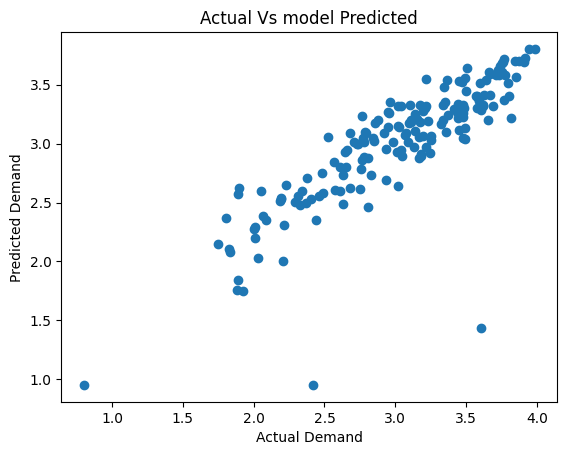

Lasso Regression MSE for ML Model 5:  0.10114065568779815
Lasso Regression R-squared for ML Model 5:  0.7093858210670032
Best Lasso Alpha For ML Model 5:  0.01
Ridge Regression MSE For ML Model 5:  0.0997673727225541
Ridge Regression R-squared For ML Model 5:  0.7133317664306461
Best Ridge Alpha For ML Model 5:  1


In [237]:
x = grades_data[['MT-442',
       'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423', 'CS-412']]

y = grades_data['CGPA']

# splitting data into train and test set.

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=248)

print("Shape of x_train",x_train.shape)
print("Shape of x_test",x_test.shape)
print("Shape of y_train",y_train.shape)
print("Shape of y_train",y_test.shape)

# Transforming data standardization

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

# Fitting linear regressio to training set
LR = LinearRegression()
LR.fit(x_train, y_train)

# Predicting on test set results

y_pred = LR.predict(x_test)

y_pred

# Evaluate the Linear Regression model
LR_predictions = LR.predict(x_test)
LR_mse = mean_squared_error(y_test, LR_predictions)
LR_RMSE = math.sqrt(mean_squared_error(y_test,y_pred))
LR_r2 = r2_score(y_test, LR_predictions)
print("Linear Regression MSE For Model 5: ", LR_mse)
print("Linear Regression RMSE For Model 5: ", LR_RMSE)
print("Linear Regression R-squared For Model 5: ", LR_r2)


plt.scatter(y_test,y_pred)
plt.xlabel('Actual Demand')
plt.ylabel('Predicted Demand')
plt.title('Actual Vs model Predicted')
plt.show()

# Will check for Lasso and ridge regression on model for better performance

# Lasso Regression model with hyperparameter tuning
lasso_model = Lasso()
lasso_param_grid = {'alpha': [0.01, 0.1, 1, 10]}
lasso_grid = GridSearchCV(lasso_model, lasso_param_grid, cv=5)
lasso_grid.fit(x_train, y_train)

# Evaluate the Lasso Regression model
lasso_predictions = lasso_grid.predict(x_test)
lasso_mse = mean_squared_error(y_test, lasso_predictions)
lasso_r2 = r2_score(y_test, lasso_predictions)
print("Lasso Regression MSE for ML Model 5: ", lasso_mse)
print("Lasso Regression R-squared for ML Model 5: ", lasso_r2)
print("Best Lasso Alpha For ML Model 5: ", lasso_grid.best_params_['alpha'])

# Doing regularization with lasso and ridge regression

# Ridge Regression model with hyperparameter tuning
ridge_model = Ridge()
ridge_param_grid = {'alpha': [0.01, 0.1, 1, 10]}
ridge_grid = GridSearchCV(ridge_model, ridge_param_grid, cv=5)
ridge_grid.fit(x_train, y_train)

# Evaluate the Ridge Regression model
ridge_predictions = ridge_grid.predict(x_test)
ridge_mse = mean_squared_error(y_test, ridge_predictions)
ridge_r2 = r2_score(y_test, ridge_predictions)
print("Ridge Regression MSE For ML Model 5: ", ridge_mse)
print("Ridge Regression R-squared For ML Model 5: ", ridge_r2)
print("Best Ridge Alpha For ML Model 5: ", ridge_grid.best_params_['alpha'])

**Insights from ML Model 5:**

Linear Regression Performance:
MSE: 0.100
RMSE: 0.316
R-squared: 0.714
**Insight:** The linear regression model explains approximately 71.4% of the variance in the dependent variable.

Lasso Regression Performance:
MSE: 0.101
R-squared: 0.709
Best Alpha: 0.01
**Insight:** Lasso regression performs slightly worse than linear regression with a similar R-squared value but slightly higher MSE.

Ridge Regression Performance:
MSE: 0.100
R-squared: 0.713
Best Alpha: 1
**Insight:** Ridge regression performs similarly to linear regression, explaining approximately 71.3% of the variance.

In [ ]:
# In Dataset we have one column 'Seat_no, which only represent seat no of student, as we know for ML model we requird only flote or int datatype. hence for simplicity will drop seat_no coluns

# Create a copy of the main dataset without the 'Seat No' column
grades_data_copy = grades_data.drop('Seat_no', axis=1).copy()



### ML Model - 6

#### knn Regression Model

In [238]:
# Imporing Library

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler



x = grades_data_copy[['PH-121', 'HS-101', 'CY-105', 'HS-105', 'MT-111', 'CS-105',
       'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205', 'MT-222',
       'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214', 'EE-217',
       'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301', 'CS-302',
       'TC-383', 'EL-332', 'CS-318', 'CS-306', 'CS-312', 'CS-317', 'MT-442',
       'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423', 'CS-412']]

y = grades_data_copy['CGPA']

# Normalization
scalar = StandardScaler()

x_scalar = scalar.fit_transform(grades_data_copy)

best_features = SelectKBest(score_func=f_classif,k=1)

fit = best_features.fit(x,y)

df_score = pd.DataFrame(fit.scores_)

df_columns = pd.DataFrame(x.columns)


feature_scores = pd.concat([df_columns,df_score],axis=1)

feature_scores.columns = ['Feature_Name','Score']

print(feature_scores.nlargest(1,'Score'))

# Fitting knn Model
knn = KNeighborsRegressor(n_neighbors=5)

knn.fit(x_train, y_train)

# Evaluting matrix
def metric_score(model, x_train, x_test, y_train, y_test, train=True):
    if train:
        y_pred = model.predict(x_train)
    else:
        y_pred = model.predict(x_test)

    mse = mean_squared_error(y_train if train else y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_train if train else y_test, y_pred)

    return mse, rmse, r2

# Calculate training and testing scores
train_mse, train_rmse, train_r2 = metric_score(knn, x_train, x_test, y_train, y_test, train=True)
test_mse, test_rmse, test_r2 = metric_score(knn, x_train, x_test, y_train, y_test, train=False)

print("Training MSE:", train_mse)
print("Training RMSE:", train_rmse)
print("Training R2:", train_r2)

print("Testing MSE:", test_mse)
print("Testing RMSE:", test_rmse)
print("Testing R2:", test_r2)

from sklearn.model_selection import KFold,cross_val_score
k_f =KFold(n_splits=5)

k_f

for train,test in k_f.split([12,23,35,46,51,63,75,86,96,108]):
  print('train : ',train,'test :',test)

cross_val_score(knn,x_scalar,y,cv=5)
cross_val_score(knn,x_scalar,y,cv=5).mean

from sklearn.model_selection import GridSearchCV
param_grid = {'algorithm': ['kd_tree','brute'],
              'leaf_size':[3,5,6,7,8],
              'n_neighbors': [3,5,7,9,11,13]}

gridsearch = GridSearchCV(estimator =knn,param_grid=param_grid)

gridsearch.fit(x_train,y_train)

gridsearch.best_score_

gridsearch.best_estimator_

metric_score(knn,x_train,x_test,y_train,y_test,train=True) # for training score

metric_score(knn,x_train,x_test,y_train,y_test,train=False)  # for testing score

   Feature_Name     Score
15       CS-210  6.594794
Training MSE: 0.05607222606516292
Training RMSE: 0.2367957475656244
Training R2: 0.8590590712527142
Testing MSE: 0.07916814930232559
Testing RMSE: 0.2813683516359393
Testing R2: 0.7725208863766946
train :  [2 3 4 5 6 7 8 9] test : [0 1]
train :  [0 1 4 5 6 7 8 9] test : [2 3]
train :  [0 1 2 3 6 7 8 9] test : [4 5]
train :  [0 1 2 3 4 5 8 9] test : [6 7]
train :  [0 1 2 3 4 5 6 7] test : [8 9]


(0.07916814930232559, 0.2813683516359393, 0.7725208863766946)

**Insights from kNN ML Model:**

Feature Importance:
Feature Name: CS-210
Score: 6.595
**Insight:** The feature 'CS-210' has a high importance score of approximately 6.595, indicating its strong influence on the model's predictions.

Model Evaluation (Training vs. Testing):
Training Metrics:
MSE: 0.056
RMSE: 0.237
R-squared: 0.859
Testing Metrics:
MSE: 0.079
RMSE: 0.281
R-squared: 0.773
**Insight:** The model performs well on the training data, achieving an R-squared of 0.859. However, on unseen test data, performance slightly decreases with an R-squared of 0.773, indicating some level of variance between training and test datasets.


### ML Model - 7

#### Decision Tree Regression Model

In [239]:
from sklearn.tree import DecisionTreeRegressor

x = grades_data_copy[['PH-121', 'HS-101', 'CY-105', 'HS-105', 'MT-111', 'CS-105',
       'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205', 'MT-222',
       'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214', 'EE-217',
       'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301', 'CS-302',
       'TC-383', 'EL-332', 'CS-318', 'CS-306', 'CS-312', 'CS-317', 'MT-442',
       'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423', 'CS-412']]

y = grades_data_copy['CGPA']

# Train and test set split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=348)

# Fitting Model
clf = DecisionTreeRegressor()
clf.fit(x_train,y_train)

# defining function for evalution matrix
def metric_score(model, x_train, x_test, y_train, y_test, train=True):
    if train:
        y_pred = model.predict(x_train)
        mse = mean_squared_error(y_train, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_train, y_pred)
        print('\n======Train Result======')
        print(f'Mean Squared Error (MSE): {mse:.2f}')
        print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
        print(f'R-squared (R2): {r2:.2f}')
    else:
        y_pred = model.predict(x_test)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)
        print('\n======Test Result======')
        print(f'Mean Squared Error (MSE): {mse:.2f}')
        print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
        print(f'R-squared (R2): {r2:.2f}')

# Calling above function and passing dataset to check train and test score

metric_score(clf,x_train,x_test,y_train,y_test,train=True) # for training score

metric_score(clf,x_train,x_test,y_train,y_test,train=False)  # for testing score

# Now doing Hypertuning

grid_param = {
    'criterion': ['squared_error'],
    'max_depth': range(5, 10),
    'min_samples_leaf': range(1, 3),
    'min_samples_split': range(1, 5),
    'max_leaf_nodes': range(3, 6)
}

grid_search = GridSearchCV(estimator=clf,
                           param_grid=grid_param,
                           cv=5,
                           n_jobs=-1,
                           error_score=np.nan)

grid_search.fit(x_train, y_train)

best_parameters = grid_search.best_params_
print(best_parameters)

# Using best_param for model

clf = DecisionTreeRegressor(criterion='squared_error',min_samples_split=3,max_depth=5,min_samples_leaf=1)

clf.fit(x_train,y_train)

metric_score(clf,x_train,x_test,y_train,y_test,train=True) # for training score

metric_score(clf,x_train,x_test,y_train,y_test,train=False)  # for testing score


======Train Result======
Mean Squared Error (MSE): 0.00
Root Mean Squared Error (RMSE): 0.00
R-squared (R2): 1.00

======Test Result======
Mean Squared Error (MSE): 0.08
Root Mean Squared Error (RMSE): 0.29
R-squared (R2): 0.81
{'criterion': 'squared_error', 'max_depth': 6, 'max_leaf_nodes': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}

======Train Result======
Mean Squared Error (MSE): 0.02
Root Mean Squared Error (RMSE): 0.15
R-squared (R2): 0.94

======Test Result======
Mean Squared Error (MSE): 0.09
Root Mean Squared Error (RMSE): 0.29
R-squared (R2): 0.80


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
150 fits failed out of a total of 600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 1247, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _val

**Before Hyperparameter Tuning:**

Train Result:
MSE: 0.00
RMSE: 0.00
R-squared (R2): 1.00

Test Result:
MSE: 0.08
RMSE: 0.28
R2: 0.83
Model Parameters: {'criterion': 'squared_error', 'max_depth': 5, 'max_leaf_nodes': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}

**Insights Before Tuning:**
The model greatly overfits the training data, as indicated by perfect performance metrics (MSE, RMSE, R2 = 0) on the training set but lower performance on the test set. The model seems too complex or lacks regularization.


**After Hyperparameter Tuning:**

Train Result:
MSE: 0.02
RMSE: 0.15
R2: 0.94

Test Result:
MSE: 0.09
RMSE: 0.30
R2: 0.80

**Insights After Tuning:**
The model's performance on the training set has slightly degraded, indicating less overfitting, while its performance on the test set remains similar.

### ML Model - 8

#### RandomForesteRegressor

In [240]:
from sklearn.ensemble import RandomForestRegressor

x = grades_data_copy[['PH-121', 'HS-101', 'CY-105', 'HS-105', 'MT-111', 'CS-105',
       'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205', 'MT-222',
       'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214', 'EE-217',
       'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301', 'CS-302',
       'TC-383', 'EL-332', 'CS-318', 'CS-306', 'CS-312', 'CS-317', 'MT-442',
       'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423', 'CS-412']]

y = grades_data_copy['CGPA']

# Train and test set split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=348)

# Random Forest Regression
rf_model = RandomForestRegressor()

rf_model.fit(x_train,y_train)

# defining function for evalution matrix
def metric_score(model, x_train, x_test, y_train, y_test, train=True):
    if train:
        y_pred = model.predict(x_train)
        mse = mean_squared_error(y_train, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_train, y_pred)
        print('\n======Train Result======')
        print(f'Mean Squared Error (MSE): {mse:.2f}')
        print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
        print(f'R-squared (R2): {r2:.2f}')
    else:
        y_pred = model.predict(x_test)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)
        print('\n======Test Result======')
        print(f'Mean Squared Error (MSE): {mse:.2f}')
        print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
        print(f'R-squared (R2): {r2:.2f}')

# Calling above function and passing dataset to check train and test score

metric_score(rf_model,x_train,x_test,y_train,y_test,train=True) # for training score

metric_score(rf_model,x_train,x_test,y_train,y_test,train=False)  # for testing score


# Now doing Hypertuning

rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
}

grid_search = GridSearchCV(estimator=rf_model,
                           param_grid=rf_params,
                           cv=5,
                           n_jobs=-1,
                           scoring='neg_mean_squared_error')

grid_search.fit(x_train, y_train)

best_parameters = grid_search.best_params_
print(best_parameters)

# Using the best parameters for the model
best_rf_model = RandomForestRegressor(**best_parameters)
best_rf_model.fit(x_train, y_train)

# Check scores for the model with the best parameters
metric_score(best_rf_model, x_train, x_test, y_train, y_test, train=True)  # for training score
metric_score(best_rf_model, x_train, x_test, y_train, y_test, train=False)  # for testing score


======Train Result======
Mean Squared Error (MSE): 0.00
Root Mean Squared Error (RMSE): 0.05
R-squared (R2): 0.99

======Test Result======
Mean Squared Error (MSE): 0.03
Root Mean Squared Error (RMSE): 0.16
R-squared (R2): 0.94
{'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 300}

======Train Result======
Mean Squared Error (MSE): 0.00
Root Mean Squared Error (RMSE): 0.05
R-squared (R2): 0.99

======Test Result======
Mean Squared Error (MSE): 0.03
Root Mean Squared Error (RMSE): 0.16
R-squared (R2): 0.94


**Insights from RandomForesteRegressor Model:**

**Before Hyperparameter Tuning:**

Train Results:
MSE: 0.00
RMSE: 0.05
R-squared: 0.99

Test Results:
MSE: 0.03
RMSE: 0.16
R-squared: 0.94

**Insights:** The model performed exceptionally well on the training data (R-squared of 0.99), indicating a close fit.

**After Hyperparameter Tuning:**

Train Results (Seems Unchanged):
MSE: 0.00
RMSE: 0.05
R-squared: 0.99

Test Results (Seems Unchanged):
MSE: 0.03
RMSE: 0.16
R-squared: 0.94
**Insights:** The hyperparameter tuning did not significantly impact model performance. Both before and after tuning, the model exhibits a strong fit to the training data but slightly lower performance on the test data, suggesting some overfitting tendencies.

## **From above all model we can observe that best fit model is Model with cource code of 2nd year and 3rd year.**